# Protein ligand simulation protocol (Ligand 3)
# C-termini

## By: Edward Francisco Méndez-Otálvaro
### Advisors: Dr. Daniel Barragán-Ramírez & Dr. Isaías Lans-Vargas

# MD protocol

### Importing packages (Analysis & Visualization)

In [2]:
import sklearn
import MDAnalysis as mda

import numpy as np 
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns
import nglview as nv

### Ligand parameterization and topology


<p>Since the small organic molecules are not included in the Amber forcefield, its parametrization is mandatory. Here <b>Antechamber</b> is used with the Python Parser (<b>ACPYPE</b>), giving the topology for Amber to Gromacs (Generalized Amber Forcefield GAFF). It's necesary to give <b>ACPYPE</b> the net charge of the molecule (Previously, the molecule has to be protonated correctly by Gypsum-DL, Chimera or Avogadro. The net charge was checked with USFC-Chimera software).</p>

In [4]:
#%%bash
#acpype -i oxpl.sdf -n 0 

Couldn't find program: 'bash'


<p>ACPYPE generates a .gro and .itp files. With these, the topology of the protein can be modified to include the ligand. A representation of the ligand structure can be visualized</p>

<p><b>ID Pubchem:</b> 118707521. <b>IUPAC Name:</b> (2R,3R,4R,5S,6R)-3-[4-[4-(4-Fluorophenyl)-1-methyl-5-pyridin-4-ylimidazol-2-yl]triazol-1-yl]-6-(hydroxymethyl)oxane-2,4,5-triol</p>

<p><b>Pose selected:</b> AutoDock. <b>Active site:</b> C-terminal. <b>Gypsum-DL numeration/variant:</b> 5. <b>AutoDock conformation:</b> 15. <b>Initial numeration:</b> 3.</p>


In [2]:
view_ligand = nv.show_file('oxpl.gro',gui=True)
view_ligand

NGLWidget()

### Building the protein topology

<p>The crystal structure <b>5HEX</b> is used to build the topology. Previously, the chain B, the crystalization waters and the cocrystalizated ligands of the structure were removed in <b>PyMOL</b>. Missing residues were modelled using PDBFixer from OpenMM engine. Pdb2gmx command of Gromacs is used to build the topology. A representation of the protein structure can be visualized.</p>

<p>The forcefield selected is <b>AMBER99SB-ILDN protein, nucleic AMBER94 (Lindorff-Larsen et al., Proteins 78, 1950-58, 2010)</b>, option 7. The command ignores hydrogens and creates an hydrogen topology according to the forcefield. The <b>-inter</b> flag permits to select appropiate protonation for charged residues (as His, Glu, Gln, Asp, Lys, Arg). The <b>-water</b> flag permits to select a TIP3P water model (compatible with the forcefield). Previously, the protonated states for these residues were calculated with <b>PROPKA</b> and the Asn and Gln flips were manually curated to maximize the hydrogen bonds between residues according to electron density profile from the crystal structure.</p>

In [6]:
%%bash 
#gmx_mpi pdb2gmx -f 5hex.pdb -o 5hex_processed.gro -ignh  -water tip3p -inter

Couldn't find program: 'bash'


In [3]:
view_protein = nv.show_file('5hex_processed.gro',gui=True)
view_protein

NGLWidget()

### Building the complex

<p>From the .gro generated by <b>ACPYPE</b>, the coordinates from the ligand are selected:</p>

In [4]:
%%bash
less oxpl.gro

oxpl_GMX.gro created by acpype (v: 2020-10-24T12:16:34CEST) on Fri May 21 11:14:30 2021
 58
    1  MOL   N1    1   9.109   1.844 -10.525
    1  MOL   N2    2   9.102   1.944 -10.439
    1  MOL   N3    3   9.000   1.926 -10.356
    1  MOL   N4    4   8.754   1.644 -10.357
    1  MOL   N5    5   8.784   1.804 -10.201
    1  MOL   N6    6   8.356   1.332 -10.266
    1  MOL   C1    7   8.941   1.810 -10.391
    1  MOL   C2    8   9.011   1.757 -10.498
    1  MOL   C3    9   8.763   1.571 -10.483
    1  MOL   C4   10   8.827   1.752 -10.318
    1  MOL   C5   11   8.682   1.724 -10.163
    1  MOL   C6   12   8.663   1.625 -10.259
    1  MOL   C7   13   8.608   1.744 -10.036
    1  MOL   C8   14   8.561   1.632  -9.966
    1  MOL   C9   15   8.490   1.649  -9.846
    1  MOL  C10   16   8.465   1.777  -9.797
    1  MOL  C11   17   8.510   1.889  -9.868
    1  MOL  C12   18   8.581   1.873  -9.987
    1  MOL  C13   19   8.556   1.524 -10.261
    1  MOL  C14   20   8.568   1.406 -10.186
    1  M

<p>Then, these coordinates are concatenated into the protein structural file, at the final of the file. Finally, the number of the atoms at the top of the .gro file are modified to include the ligand.</p>

In [7]:
%%bash
less complex.gro

Gallium Rubidium Oxygen Manganese Argon Carbon Silicon
   14028
   17ASP      N    1   4.659  -0.721  -2.606
   17ASP     H1    2   4.661  -0.682  -2.698
   17ASP     H2    3   4.574  -0.695  -2.561
   17ASP     H3    4   4.737  -0.686  -2.553
   17ASP     CA    5   4.668  -0.866  -2.615
   17ASP     HA    6   4.756  -0.885  -2.658
   17ASP     CB    7   4.665  -0.930  -2.476
   17ASP    HB1    8   4.574  -0.917  -2.436
   17ASP    HB2    9   4.733  -0.885  -2.418
   17ASP     CG   10   4.695  -1.078  -2.480
   17ASP    OD1   11   4.814  -1.113  -2.499
   17ASP    OD2   12   4.601  -1.159  -2.466
   17ASP      C   13   4.553  -0.922  -2.699
   17ASP      O   14   4.560  -1.035  -2.750
   18GLN      N   15   4.446  -0.844  -2.711
   18GLN      H   16   4.435  -0.762  -2.654
   18GLN     CA   17   4.344  -0.880  -2.808
   18GLN     HA   18   4.337  -0.980  -2.805
   18GLN     CB   19   4.208  -0.820  -2.768
   18GLN    HB1   20   4.218  -0.721  -2.761
   18GLN    HB2   21   4.181  -0.857

### Building the topology

<p>The protein topology <b>(topol.top file)</b> is modified to include the ligand topology <b>(oxls.itp)</b>. In that way:</p>

First part:

  ```
  ; Include forcefield parameters
  #include "amber99sb-ildn.ff/forcefield.itp"

  ; Include ligand parameters
  #include "oxpl.itp"

  [ moleculetype ]
  ; Name            nrexcl
  Protein_chain_A     3
  ```
Final part:

  ```
  [ atoms ]
  ;   nr       type  resnr residue  atom   cgnr     charge       mass  typeB    chargeB      massB
  ; residue  17 ASP rtp NASP q  0.0
  
  [ molecules ]
  ; Compound        #mols
  Protein_chain_A     1
  oxpl                1
  ```

In [5]:
%%bash
tail topol.top

[ system ]
; Name
HK2 and oxpl in water

[ molecules ]
; Compound        #mols
Protein_chain_A     1
oxpl                1
SOL             81658
NA                 15


### Defining box size and solvation

<p>A dodecahedron solvation box (unit cell) with TIP3P explicit water is built around the protein, with a distance between the protein and the edge of the box of 1 nm</p>

In [8]:
%%bash
#gmx editconf -f complex.gro -o newbox.gro -bt dodecahedron -d 1.0

Couldn't find program: 'bash'


In [9]:
%%bash
#gmx solvate -cp newbox.gro -cs spc216.gro -p topol.top -o solv.gro

Couldn't find program: 'bash'


In [6]:
view_solv_prot = nv.show_file('solv_ions.gro',gui=True)
view_solv_prot

NGLWidget()

### Neutralizing the system with Na+ and Cl- ions

<p>The protein has a total charge of -15 (from the protonation of the residues). A .tpr file is generated by <b>grompp</b> to add ions to the system using command <b>genion</b>. The next line of commands and .mdp is used:</p>


In [9]:
%%bash
less ions.mdp

; ions.mdp - used as input into grompp to generate ions.tpr
; Parameters describing what to do, when to stop and what to save
integrator  = steep         ; Algorithm (steep = steepest descent minimization)
emtol       = 1000.0        ; Stop minimization when the maximum force < 1000.0 kJ/mol/nm
emstep      = 0.01          ; Minimization step size
nsteps      = 50000         ; Maximum number of (minimization) steps to perform

; Parameters describing how to find the neighbors of each atom and how to calculate the interactions
nstlist         = 1         ; Frequency to update the neighbor list and long range forces
cutoff-scheme	= Verlet    ; Buffered neighbor searching 
ns_type         = grid      ; Method to determine neighbor list (simple, grid)
coulombtype     = cutoff       ; Treatment of long range electrostatic interactions
rcoulomb        = 1.2       ; Short-range electrostatic cut-off
rvdw            = 1.2       ; Short-range Van der Waals cut-off
pbc             = xyz       ; P

In [11]:
%%bash
#gmx grompp -f ions.mdp -c solv.gro -p topol.top -o ions.tpr

Couldn't find program: 'bash'


In [12]:
%%bash
#gmx genion -s ions.tpr -o solv_ions.gro -p topol.top -pname NA -nname CL -neutral

Couldn't find program: 'bash'


<p>So, the total system consists of the protein, the ligand, the waters and Na+ ions:</p>

```
[ molecules ]
; Compound        #mols
Protein_chain_A     1
oxpl                1
SOL             81659
NA                 15
```

### Energy minimization

<p>The system is subjected to a energy minimization to get a local minima in the potential energy surface. The next line of commands and .mdp is used:</p>

In [10]:
%%bash
less em.mdp

; em.mdp - used as input into grompp to generate em.tpr
; Parameters describing what to do, when to stop and what to save
integrator  = steep         ; Algorithm (steep = steepest descent minimization)
emtol       = 1000.0        ; Stop minimization when the maximum force < 1000.0 kJ/mol/nm
emstep      = 0.01          ; Minimization step size
nsteps      = 50000         ; Maximum number of (minimization) steps to perform

; Parameters describing how to find the neighbors of each atom and how to calculate the interactions
nstlist         = 1           ; Frequency to update the neighbor list and long range forces
cutoff-scheme   = Verlet       ; Buffered neighbor searching
ns_type         = grid         ; Method to determine neighbor list (simple, grid)
coulombtype     = PME          ; Treatment of long range electrostatic interactions
rcoulomb        = 1.2          ; Short-range electrostatic cut-off
vdwtype         = Cut-off      ; Treatment of vdw interactions
vdw-modifier    = Force-

In [13]:
%%bash
#gmx grompp -f em.mdp -c solv_ions.gro -p topol.top -o em.tpr

Couldn't find program: 'bash'


In [14]:
%%bash
#gmx mdrun -v -deffnm em

Couldn't find program: 'bash'


<p>The final output of the energy minimization gives the info and the plot:</p>


In [11]:
%%bash
less em.log

                      :-) GROMACS - gmx mdrun, 2020.2 (-:

                            GROMACS is written by:
     Emile Apol      Rossen Apostolov      Paul Bauer     Herman J.C. Berendsen
    Par Bjelkmar      Christian Blau   Viacheslav Bolnykh     Kevin Boyd    
 Aldert van Buuren   Rudi van Drunen     Anton Feenstra       Alan Gray     
  Gerrit Groenhof     Anca Hamuraru    Vincent Hindriksen  M. Eric Irrgang  
  Aleksei Iupinov   Christoph Junghans     Joe Jordan     Dimitrios Karkoulis
    Peter Kasson        Jiri Kraus      Carsten Kutzner      Per Larsson    
  Justin A. Lemkul    Viveca Lindahl    Magnus Lundborg     Erik Marklund   
    Pascal Merz     Pieter Meulenhoff    Teemu Murtola       Szilard Pall   
    Sander Pronk      Roland Schulz      Michael Shirts    Alexey Shvetsov  
   Alfons Sijbers     Peter Tieleman      Jon Vincent      Teemu Virolainen 
 Christian Wennberg    Maarten Wolf      Artem Zhmurov   
                           and the project leaders:
      

In [ ]:
%%bash
#gmx energy -f em.edr -o potential.xvg
#>10 0

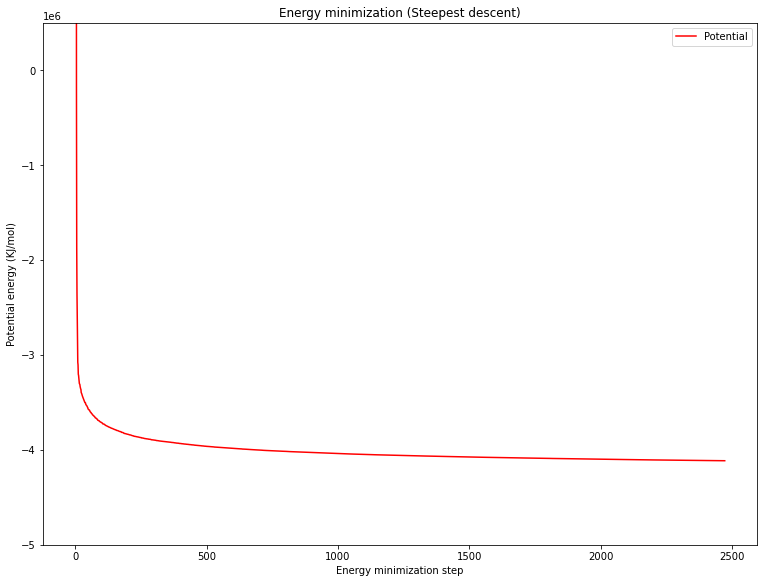

Step       em_lig3
0        0.0  3.209127e+09
1        1.0  2.178050e+08
2        2.0  5.149461e+07
3        3.0  7.733289e+06
4        4.0 -1.783456e+05
...      ...           ...
1954  2468.0 -4.113868e+06
1955  2469.0 -4.113887e+06
1956  2470.0 -4.113905e+06
1957  2471.0 -4.113913e+06
1958  2473.0 -4.113999e+06

[1959 rows x 2 columns]

In [3]:
x,y = np.loadtxt("potential.xvg",comments=['#','@'],unpack=True)
fig = plt.figure(figsize=[12.8, 9.6])
ax1 = fig.add_subplot(111)
ax1.set_title("Energy minimization (Steepest descent)")    
ax1.set_xlabel('Energy minimization step')
ax1.set_ylabel('Potential energy (KJ/mol)')
ax1.plot(x,y, c='r', label='Potential')
plt.ylim(-5.0e+06,0.5e+06)
leg = ax1.legend()
plt.show()  

emplot_lig3=x,y 
emplot_lig3=pd.DataFrame(emplot_lig3)
emplot_lig3=emplot_lig3.T
emplot_lig3.columns=['Step','em_lig3']
emplot_lig3.to_csv('emplot_lig3.csv')
emplot_lig3

### Restraining the ligand during equilibration

<p>In order to permit a correct equilibration of the solvent around the protein and the ligand, harmonic restraints are applied to the heavy atoms of the ligand and the protein (avoiding difussion of the ligand outside the active site). The heavy atoms of the ligand are selected by a <b>index gromacs group (ndx)</b>, and position restraints are generated for this selection (with a <b>force constant of 1000 KJ/mol</b>)</p>

In [16]:
%%bash
#gmx make_ndx -f oxpl.gro -o index_oxpl.ndx
#...
# > 0 & ! a H*
# > q

Couldn't find program: 'bash'


In [17]:
%%bash
#gmx genrestr -f oxpl.gro -n index_oxpl.ndx -o posre_oxpl.itp -fc 1000 1000 1000

Couldn't find program: 'bash'


<p>The position restraints topology file generated is used to modify the topology and include that modification into the restraints of the protein. Here the position restraints are coupled (protein and ligand)</p>

```
; Include Position restraint file
#ifdef POSRES
#include "posre.itp"
#endif

; Ligand position restraints
#ifdef POSRES
#include "posre_oxpl.itp"
#endif

; Include water topology
#include "amber99sb-ildn.ff/tip3p.itp"

#ifdef POSRES_WATER
; Position restraint for each water oxygen
[ position_restraints ]
;  i funct       fcx        fcy        fcz
   1    1       1000       1000       1000
#endif

; Include topology for ions
#include "amber99sb-ildn.ff/ions.itp"
```

### Thermal equilibration in NVT ensemble

<p>A thermal equilibration is carrying out by modified Berendsen thermostat V-rescale (couple temperature to external heat bath according to Berendsen method). The reference temperature is 37°C (310 K) and the time of equilibration is 100 ps. The V-rescale thermostat method relaxes very quickly and has small fluctuations, it is useful for equilibration. Two groups were created to be coupled to the thermostat: Protein-ligand & Ions-Solvent (waters). The next .mdp and line of commands are used for the equilibration. Also the temperature is plotted:</p>

<p>First, we create an index with protein and ligand as a unique subsystem</p>

In [ ]:
#gmx make_ndx -f em.gro -o index.ndx
#> 1 | 13
#> q

In [13]:
%%bash
less nvt.mdp

title                   =  HKII-ligand NVT force field NVT equilibration
define                  = -DPOSRES     ; position restrain the protein

; Run parameters
integrator              = md           ; leap-frog integrator
nsteps                  = 50000        ; 2 * 50000 = 100 ps
dt                      = 0.002        ; 2 fs

; Output control
nstxout                 = 500          ; save coordinates every 1.0 ps
nstfout                 = 500          ; save forces every 1.0 ps
nstvout                 = 500          ; save velocities every 1.0 ps
nstenergy               = 500          ; save energies every 1.0 ps
nstlog                  = 500          ; update log file every 1.0 ps
nstcalcenergy           = 100          ; frequency for calculating the energies

; Bond parameters
continuation            = no        ; first dynamics run
constraint_algorithm    = lincs     ; holonomic constraints 
constraints             = h-bonds   ; bonds involving H are constrained
lincs_iter        

In [18]:
%%bash
#gmx grompp -f nvt.mdp -c em.gro -r em.gro -p topol.top -n index.ndx -o nvt.tpr

Couldn't find program: 'bash'


In [19]:
%%bash
#gmx mdrun -deffnm nvt

Couldn't find program: 'bash'


In [ ]:
%%bash
#gmx energy -f nvt.edr -o temperature.xvg
#>16 0

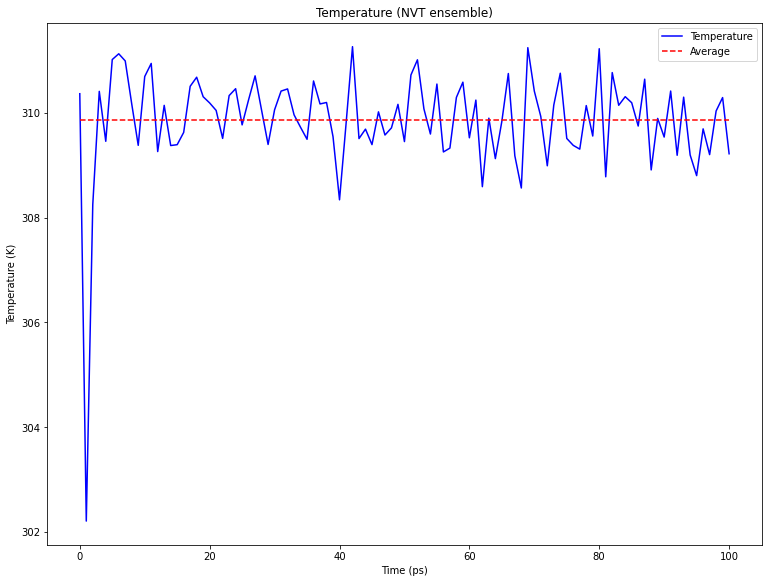

time    Teq_lig3
0      0.0  310.361237
1      1.0  302.211365
2      2.0  308.248657
3      3.0  310.406250
4      4.0  309.453979
..     ...         ...
96    96.0  309.690918
97    97.0  309.199860
98    98.0  310.031860
99    99.0  310.287750
100  100.0  309.216309

[101 rows x 2 columns]

In [5]:
x_T,y_T = np.loadtxt("temperature.xvg",comments=['#','@'],unpack=True)
fig = plt.figure(figsize=[12.8, 9.6])
y_T_mean = [np.mean(y_T)]*len(x_T)

ax1 = fig.add_subplot(111)
ax1.set_title("Temperature (NVT ensemble)")    
ax1.set_xlabel('Time (ps)')
ax1.set_ylabel('Temperature (K)')
ax1.plot(x_T,y_T, c='b', label='Temperature')
ax1.plot(x_T,y_T_mean, label='Average', linestyle='--',c='r')
leg = ax1.legend()
plt.show()  

temperaeq_lig3=x_T,y_T
temperaeq_lig3=pd.DataFrame(temperaeq_lig3)
temperaeq_lig3=temperaeq_lig3.T
temperaeq_lig3.columns=['time','Teq_lig3']
temperaeq_lig3
temperaeq_lig3.to_csv('temperaeq_lig3.csv')
temperaeq_lig3

### Pressure and thermal equilibration in NPT ensemble

<p>A pressure and thermal equilibration is carrying out by modified Berendsen thermostat V-rescale (couple temperature to external heat bath according to Berendsen method) and Berendsen barostat. The reference temperature is 37°C (310 K) and the reference pressure is 1 bar (100000 Pa). The time of equilibration is 100 ps. Two groups were created to be coupled to the thermostat and barostat: Protein-ligand & Ions-Solvent (waters). The next .mdp and line of commands are used for the equilibration. Also the pressure and density are plotted:</p>

In [15]:
%%bash
less npt.mdp

title                   =  HKII-ligand NPT force field NPT equilibration 
define                  = -DPOSRES  ; position restrain the protein

; Run parameters
integrator              = md           ; leap-frog integrator
nsteps                  = 50000        ; 2 * 50000 = 100 ps
dt                      = 0.002        ; 2 fs

; Output control
nstxout                 = 500          ; save coordinates every 1.0 ps
nstfout                 = 500          ; save forces every 1.0 ps
nstvout                 = 500          ; save velocities every 1.0 ps
nstenergy               = 500          ; save energies every 1.0 ps
nstlog                  = 500          ; update log file every 1.0 ps
nstcalcenergy           = 100          ; frequency for calculating the energies

; Bond parameters
continuation            = yes          ; Restarting after NVT 
constraint_algorithm    = lincs        ; holonomic constraints 
constraints             = h-bonds      ; bonds involving H are constrained
lincs_it

In [21]:
%%bash
#gmx grompp -f npt.mdp -c nvt.gro -t nvt.cpt -r nvt.gro -p topol.top -n index.ndx -o npt.tpr

Couldn't find program: 'bash'


In [22]:
%%bash
#gmx mdrun -deffnm npt

Couldn't find program: 'bash'


In [ ]:
#gmx energy -f npt.edr -o pressure.xvg
#>18 0

In [ ]:
#gmx energy -f npt.edr -o density.xvg
#>24 0

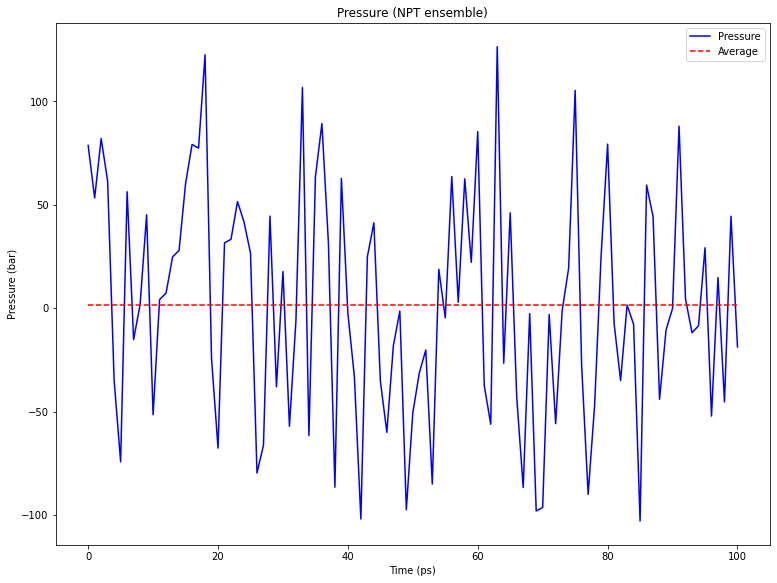

time   Peq_lig3
0      0.0  78.681229
1      1.0  53.258942
2      2.0  82.009293
3      3.0  61.415390
4      4.0 -34.935753
..     ...        ...
96    96.0 -52.152512
97    97.0  14.843399
98    98.0 -45.271690
99    99.0  44.452423
100  100.0 -18.714767

[101 rows x 2 columns]

In [6]:
x_V,y_V = np.loadtxt("pressure.xvg",comments=['#','@'],unpack=True)
fig = plt.figure(figsize=[12.8, 9.6])
y_V_mean = [np.mean(y_V)]*len(x_V)

ax1 = fig.add_subplot(111)
ax1.set_title("Pressure (NPT ensemble)")    
ax1.set_xlabel('Time (ps)')
ax1.set_ylabel('Pressure (bar)')
ax1.plot(x_V,y_V, c='b', label='Pressure')
ax1.plot(x_V,y_V_mean, label='Average', linestyle='--',c='r')
leg = ax1.legend()
plt.show()

pressureeq_lig3=x_V,y_V 
pressureeq_lig3=pd.DataFrame(pressureeq_lig3)
pressureeq_lig3=pressureeq_lig3.T
pressureeq_lig3.columns=['time','Peq_lig3']
pressureeq_lig3
pressureeq_lig3.to_csv('pressureeq_lig3.csv')
pressureeq_lig3

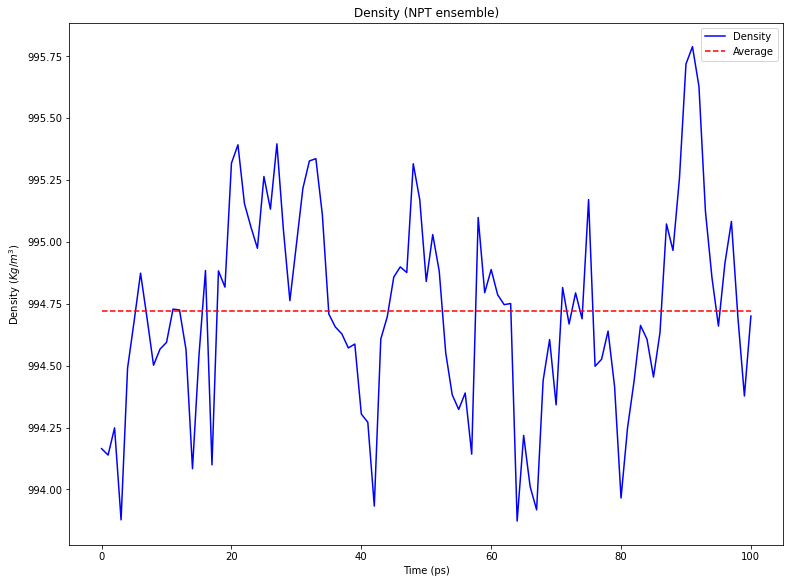

In [10]:
x_rho,y_rho = np.loadtxt("density.xvg",comments=['#','@'],unpack=True)
fig = plt.figure(figsize=[12.8, 9.6])
y_rho_mean = [np.mean(y_rho)]*len(x_rho)

ax1 = fig.add_subplot(111)
ax1.set_title("Density (NPT ensemble)")    
ax1.set_xlabel('Time (ps)')
ax1.set_ylabel('Density ($Kg/m^{3}$)')
ax1.plot(x_rho,y_rho, c='b', label='Density')
ax1.plot(x_rho,y_rho_mean, label='Average', linestyle='--',c='r')
leg = ax1.legend()
plt.show()

### MD production

<p>After the equilibration, the position restraints are released, and the system can visit all the possible conformations in the dynamics. The production is running by <b>50 ns</b>.</p>

In [25]:
%%bash
#gmx grompp -f md.mdp -c npt.gro -t npt.cpt -p topol.top -n index.ndx -o md_0_10.tpr

Couldn't find program: 'bash'


In [26]:
%%bash
#gmx mdrun -deffnm md_0_10

Couldn't find program: 'bash'


### Recentering coordinates

<p>As in any simulation conducted with periodic boundary conditions, molecules may appear "broken" or may "jump" back and forth across the box. To recenter the protein and rewrap the molecules within the unit cell to recover the desired rhombic dodecahedral shape, <b>trjconv</b> command is used</p>

In [11]:
##Since system is too big to be read, only protein and ligand trajectories will be used (with a dt of 50 ps)
#%%bash

#gmx trjconv -s md_0_10.tpr -f md_0_10.xtc -o md_0_10noPBC.xtc -pbc mol -ur compact 
#gmx editconf -f md_0_10.gro -n index.ndx -o md_0_10_ana.gro
#gmx trjconv -s md_0_10.tpr -f md_0_10noPBC.xtc -n index.ndx -o md_0_10_ana.xtc -dt 50 

# Validation

### Reading trajectories and structure file from the MD simulation

In [12]:
u_MD = mda.Universe('md_0_10.tpr', 'md_0_10noPBC.xtc')

In [14]:
%%bash
tail md_0_10.gro

83472NA      NA59009   0.031   6.464   8.086  0.3472  0.2944 -0.3289
83473NA      NA59010   2.582  14.086   6.226  0.5825  0.5229  0.1507
83474NA      NA59011   9.294  13.221   2.786  0.2900 -0.1978  0.0122
83475NA      NA59012   1.600   6.315   8.881  0.4341 -0.3655  0.1978
83476NA      NA59013   5.351   2.484   8.240  0.5616 -0.2113 -0.3387
83477NA      NA59014  15.213   6.717   6.169 -0.3736 -0.4090 -0.3116
83478NA      NA59015   8.182   8.166   4.830  0.0984  0.0541 -0.2504
83479NA      NA59016   1.567   5.479   7.558  0.2237  0.3682 -0.3459
83480NA      NA59017  15.004   6.892   5.472  0.0297 -0.3878  0.5984
  15.48367  15.48367  10.94861   0.00000   0.00000   0.00000   0.00000   7.74184   7.74184


In [15]:
u_MD.atoms

<AtomGroup with 259017 atoms>

In [16]:
#complex_MD=u_MD.select_atoms("resname LIG" and "resid 17:911")
complex_MD=u_MD.select_atoms("resid 17:911")+u_MD.select_atoms("resname MOL")

/home/edward/anaconda3/envs/AmberTools20/lib/python3.9/site-packages/MDAnalysis/core/selection.py:640: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  mask = np.zeros(len(vals), dtype=np.bool)


In [17]:
u_MD.trajectory

<XTCReader md_0_10noPBC.xtc with 5001 frames of 259017 atoms>

In [18]:
MD_movie=nv.show_mdanalysis(complex_MD,gui=True)
MD_movie

NGLWidget(max_frame=5000)

## Physical validation of the simulations

<p>A first step to check if the MD simulations are reliable consists to verify the behavior of certain observables under a thermodynamic ensemble of study. Some rules of thumb are:

<ul><li><b>Conservation of energy and momentum: </b>Checking kinetic (E<sub>K</sub>) and total energy (E<sub>T</sub>) conservation and convergence. As a rule of thumb, E<sub>T</sub>/E<sub>K</sub> &lt; 0.05 for a well behaved system.</li>
<li><b>Reliable observables: </b>Checking differences between density, using experimental reliable data of solution (in this case, since its water, protein, and some cations, the density would be a little bit different when it's compared with the density of pure water at T= 310K and P= 1 Bar). Here, the density of pure water at the thermodynamic state given by P and T is 993.36 Kg/m<sup>3</sup> <i>[Cengel, Y. A., Boles, M. A., & Kanoglu, M. (2011). Thermodynamics: an engineering approach (Vol. 5, p. 445). New York: McGraw-hill.]</i></li>
</ul></p>    


#### Conservation of energy and momentum

In [ ]:
#gmx energy -f md_0_10.edr -o tot_ener.xvg
#>13 0

In [ ]:
#gmx energy -f md_0_10.edr -o kin_ener.xvg
#>12 0

In [ ]:
#gmx energy -f md_0_10.edr -o md_density.xvg
#>23 0

<Figure size 921.6x691.2 with 0 Axes>

<Figure size 921.6x691.2 with 0 Axes>

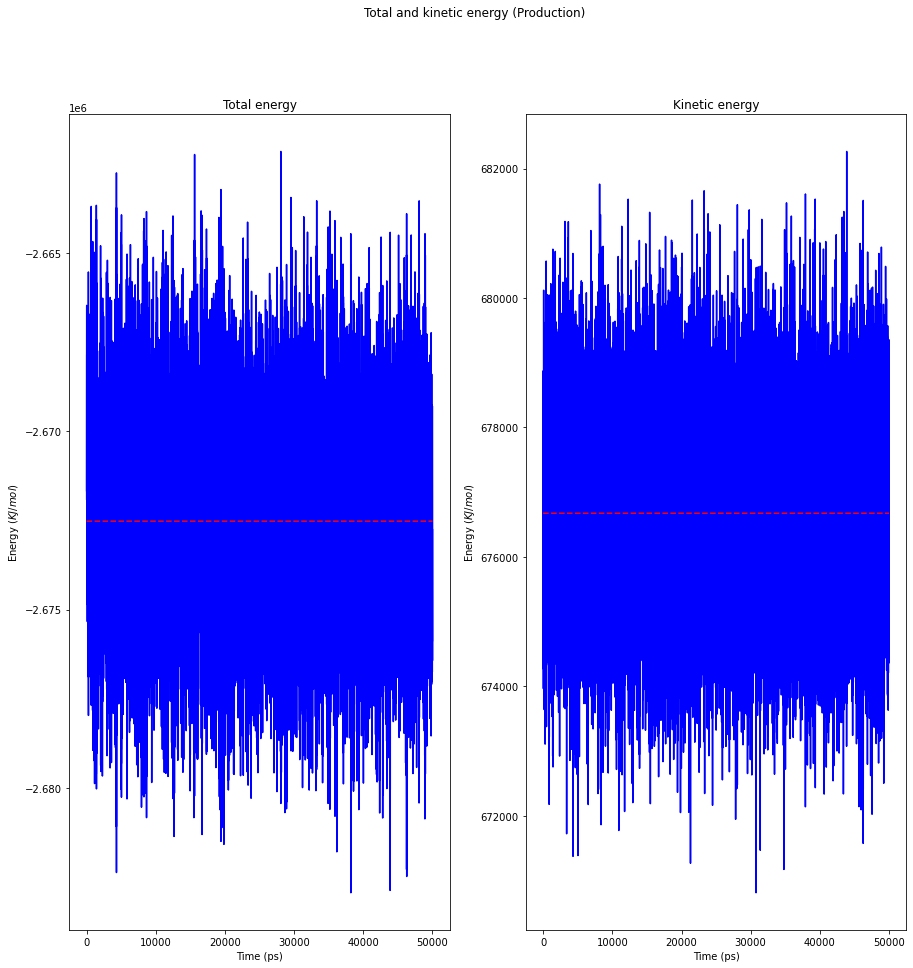

In [19]:
##Total energy
x_totener,y_totener = np.loadtxt("tot_ener.xvg",comments=['#','@'],unpack=True)
fig = plt.figure(figsize=[12.8, 9.6])
y_totener_mean = [np.mean(y_totener)]*len(y_totener)

##Kinetic energy
x_kinener,y_kinener = np.loadtxt("kin_ener.xvg",comments=['#','@'],unpack=True)
fig = plt.figure(figsize=[12.8, 9.6])
y_kinener_mean = [np.mean(y_kinener)]*len(y_kinener)

fig, (ax1, ax2) = plt.subplots(1,2,figsize=(15,15))
fig.suptitle('Total and kinetic energy (Production)')

ax1.set_title("Total energy")    
ax1.set_xlabel('Time (ps)')
ax1.set_ylabel('Energy ($KJ/mol$)')
ax1.plot(x_totener,y_totener, c='b', label='Total energy')
ax1.plot(x_totener,y_totener_mean, label='Average', linestyle='--',c='r')

ax2.set_title("Kinetic energy")    
ax2.set_xlabel('Time (ps)')
ax2.set_ylabel('Energy ($KJ/mol$)')
ax2.plot(x_kinener,y_kinener, c='b', label='Kinetic energy')
ax2.plot(x_kinener,y_kinener_mean, label='Average', linestyle='--',c='r')

plt.show()

In [20]:
R=np.mean(y_totener)/np.mean(y_kinener)
print(R)

-3.9494883594975416


<p>So according to the total and kinetic ratio, the system is well behaved, i.e.,  <b>R &lt; 0.05</b></p>

#### Reliable observables

/home/edward/anaconda3/envs/MD/lib/python3.6/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/home/edward/anaconda3/envs/MD/lib/python3.6/site-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/home/edward/anaconda3/envs/MD/lib/python3.6/site-packages/seaborn/distributions.py:1649: FutureWarning: The `vertical` parameter is deprecated and will be removed in a future version. Assign the data to the `y` variable instead.
  warnings.warn(msg, FutureWarning)


time  rhoeq_lig3
0          0.0  994.700623
1          2.0  994.511108
2          4.0  994.260071
3          6.0  994.030701
4          8.0  993.806641
...        ...         ...
24996  49992.0  995.802490
24997  49994.0  996.293579
24998  49996.0  996.056274
24999  49998.0  995.273010
25000  50000.0  994.323914

[25001 rows x 2 columns]

<Figure size 921.6x691.2 with 0 Axes>

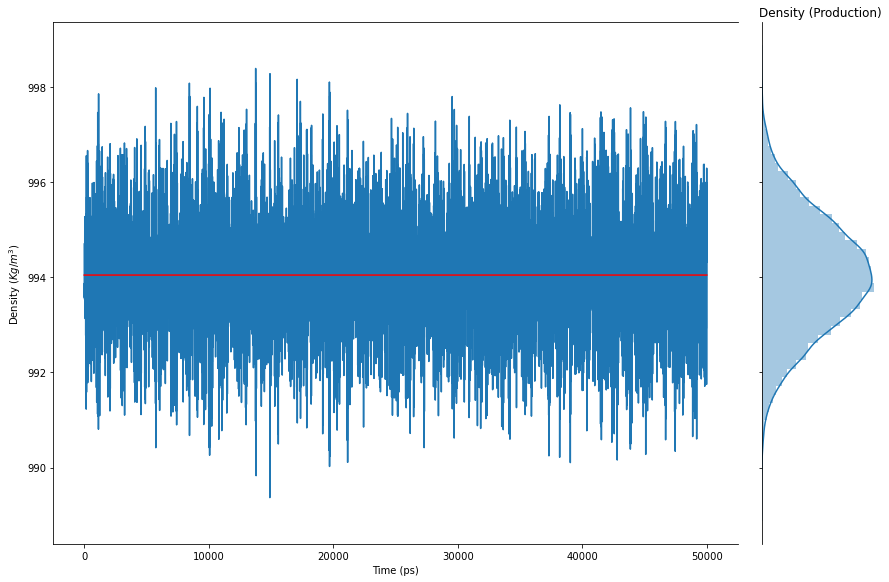

In [7]:
##Extracting density
x_md_rho,y_md_rho = np.loadtxt("md_density.xvg",comments=['#','@'],unpack=True)
fig = plt.figure(figsize=[12.8, 9.6])
y_md_rho_mean = [np.mean(y_md_rho)]*len(y_md_rho)

grid_npt = sns.JointGrid(x_md_rho, y_md_rho, ratio=5)
grid_npt.plot_joint(plt.plot)
grid_npt.ax_joint.plot(x_md_rho, y_md_rho_mean, c='red')

plt.sca(grid_npt.ax_marg_y)
sns.distplot(grid_npt.y, kde=True, vertical=True)

# override a bunch of the default JointGrid style options
grid_npt.fig.set_size_inches(12.8, 9.6)
grid_npt.ax_marg_x.remove()
grid_npt.ax_joint.spines['top'].set_visible(True)
grid_npt.set_axis_labels('Time (ps)', 'Density ($Kg/m^{3}$)')
plt.title("Density (Production)")


density_lig3=x_md_rho,y_md_rho
density_lig3=pd.DataFrame(density_lig3)
density_lig3=density_lig3.T
density_lig3.columns=['time','rhoeq_lig3']
density_lig3
density_lig3.to_csv('density_lig3.csv')
density_lig3

In [27]:
rho_teorico=993.36 
Error_rho=(abs(np.mean(y_md_rho)-rho_teorico)/rho_teorico)*100
print(Error_rho)

0.06910615572636866


<p>So according to the absolute error between the true value and the average density from NPT ensemble, the system is well behaved ( <b>%Error=0.07</b> for pure water at T=310 K and P= 1 Bar).</p>

## Structural and statistical validation of the simulations

<p>The only way to get reliable results from the MD is by guaranteeing that a correct statistical NPT ensemble is being sampled. Also that the experimental observables are well reproduced and that there are not strange behaviors on the system. When all of these statements are checked, it is possible to quantify the variable of interest, i. e. the free energy. Here we check the above assumptions by means of different tests given by the literature.</p>

### Root mean square deviation of the protein and the ligand (RMSD)

<p>The RMSD is a qualitative measure of the deviation of the position of the atoms in the system across the simulation. Formally, is a function of time of the <b>euclidean distance in configuration space of the current configuration (after appropriate translation and rotation transformations) from a reference configuration</b>, divided by the number of coordinates. This test is the first one that should be check to have an insight into convergence of simulation</p>

In [ ]:
##Since system is too big to be read, only protein and ligand trajectories will be used (with a dt of 50 ps)
#%%bash

#gmx trjconv -s npt.tpr -f npt.gro -n index.ndx -o npt_ana.gro -pbc mol -ur compact
#gmx trjconv -s md_0_10.tpr -f md_0_10.gro -n index.ndx -o md_0_10_ana.gro -pbc mol -ur compact
#gmx_mpi trjconv -s em.tpr -f em.gro -n index.ndx -o emcenter.gro -pbc mol -ur compact
#gmx trjconv -s md_0_10.tpr -f md_0_10noPBC.xtc -n index.ndx -o md_0_10_ana.xtc -dt 50 

In [11]:
from MDAnalysis.analysis import align
from MDAnalysis.analysis.rms import rmsd
import MDAnalysis.analysis.rms

reference=mda.Universe('emcenter.gro') 
u_ana = mda.Universe('md_0_10_ana.gro','md_0_10_ana.xtc')   

In [4]:
##Checking trajectories

MD_movie_ana=nv.show_mdanalysis(u_ana,gui=True)
MD_movie_ana

NGLWidget(max_frame=1000)

In [12]:
R_prot = MDAnalysis.analysis.rms.RMSD(u_ana, reference,select="protein and backbone")                                   
R_prot.run()

In [13]:
R_lig = MDAnalysis.analysis.rms.RMSD(u_ana, reference,select="resname MOL")                                   
R_lig.run()

In [15]:
#Function to get averages
def moving_average(x, w):
    return np.convolve(x, np.ones(w), 'same') / w

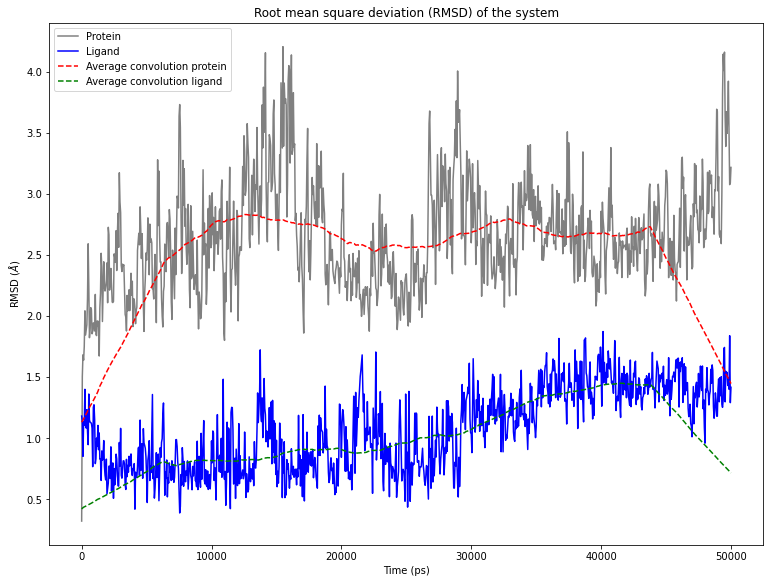

In [16]:
%matplotlib inline
rmsd = R_prot.rmsd.T   # transpose makes it easier for plotting
time = rmsd[1]
fig = plt.figure(figsize=[12.8, 9.6])
ax = fig.add_subplot(111)
rmsd_lig=R_lig.rmsd.T

ax.plot(time, rmsd[2], 'gray',  label="Protein")
ax.plot(time, rmsd_lig[2], 'b-',  label="Ligand")
ax.plot(time,moving_average(rmsd[2],250), label='Average convolution protein', linestyle='--',c='r')
ax.plot(time,moving_average(rmsd_lig[2],250), label='Average convolution ligand', linestyle='--',c='g')

ax.set_title("Root mean square deviation (RMSD) of the system")    
ax.legend(loc="best")
ax.set_xlabel("Time (ps)")
ax.set_ylabel(r"RMSD ($\AA$)")
plt.show()

In [9]:
pd.DataFrame(rmsd.T).to_csv('rmsd_lig3.csv')

In [10]:
pd.DataFrame(rmsd_lig.T).to_csv('rmsdlig_lig3.csv')

<p>If numerous transitions among apparent metastable regions (RMSD fluctuates rapidly about a local mean) are seeing, there is an adequate sampling for the configurational space given by the simulation. On other hand, if RMSD changes only in one direction or exhibits few transitions among apparent metastable regions, there is not good sampling. One can see that both entities (protein and ligand) are fluctuating according to the first statement. Of course, protein has more transitions since all the degrees of freedom.</p>

### All-to-all Root mean square deviation of the atoms (Pairwise RMSD)

<p>An all-to-all RMSD plot is better to check convergence since one can identify very similar structures during the time series. The idea behind this kind of RMSD is to calculate RMSD between each snapshot of the trajectory against all the others snapshots.</p> 

In [30]:
aligner_pairmsd_protein = align.AlignTraj(u_ana, u_ana, select='protein and backbone',in_memory=True).run()
aligner_pairmsd_ligand=align.AlignTraj(u_ana, u_ana, select='resname MOL',in_memory=True).run()

/home/edward/anaconda3/envs/AmberTools20/lib/python3.9/site-packages/MDAnalysis/core/selection.py:521: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  mask = np.zeros(len(group), dtype=np.bool)


In [31]:
from MDAnalysis.analysis import diffusionmap, align, rms

matrix_pairmsd_protein = diffusionmap.DistanceMatrix(u_ana, select='protein and backbone').run()
matrix_pairmsd_lig = diffusionmap.DistanceMatrix(u_ana, select='resname MOL').run()

Text(0.5, 1.0, 'All-to-all Root mean square deviation of the atoms (Protein Backbone)')

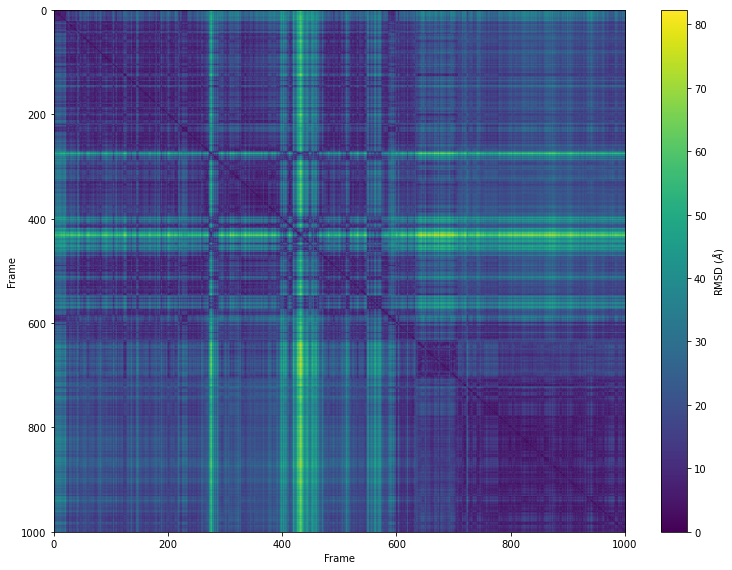

In [32]:
fig = plt.figure(figsize=[12.8, 9.6])
plt.imshow(matrix_pairmsd_protein.dist_matrix, cmap='viridis',aspect='auto')
plt.xlabel('Frame')
plt.ylabel('Frame')
plt.colorbar(label=r'RMSD ($\AA$)')
ax.set_title("All-to-all Root mean square deviation of the atoms (Protein Backbone)")   

Text(0.5, 1.0, 'All-to-all Root mean square deviation of the atoms (Ligand)')

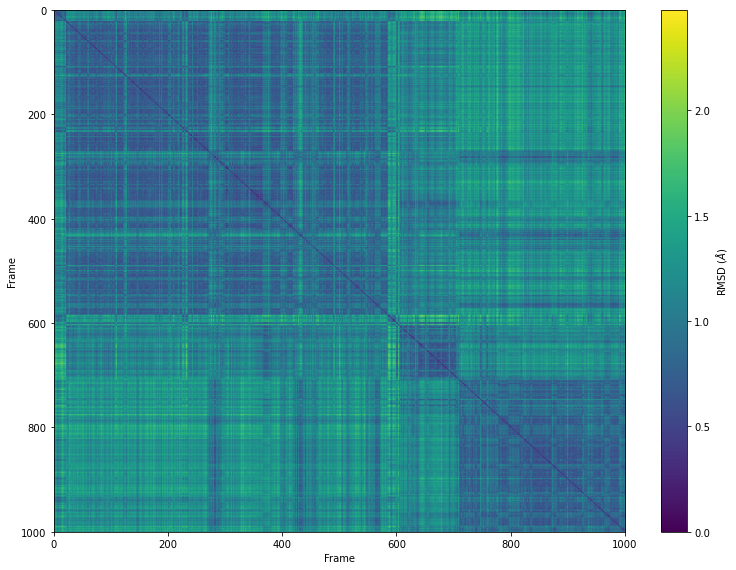

In [33]:
fig = plt.figure(figsize=[12.8, 9.6])
plt.imshow(matrix_pairmsd_lig.dist_matrix, cmap='viridis',aspect='auto')
plt.xlabel('Frame')
plt.ylabel('Frame')
plt.colorbar(label=r'RMSD ($\AA$)')
ax.set_title("All-to-all Root mean square deviation of the atoms (Ligand)")   

<p>This plot has values of zero along the diagonal. Blocks of similar RMSD along the diagonal refers to the occupation of a given state in the sampling. One can see that there are two big states in this simulation (between 100 and 200 frames, 300 and 450 frames and 600 to 800 frames) and also two or three transition states before and after these two. 

Regions of low RMSD between structures sampled far apart in time (blue regions far apart from the diagonal) indicate that the system is visiting again sampled states, and that is a necessary condition for good statistics (And here this occurs).</p>

### Combined clustering test

<p>Another test to check the convergence of structure population is the combined clustering strategy. Here, the trajectory is split into two or more independent trajectories and in each trajectory, a cluster analysis is performed (using a similarity index like matrix distance or RMSD). Thus, major conformational substates of the system's trajectory can be identified and good sampling behavior can be checked.</p>

In [ ]:
##Splitting trajectory in two blocks (with a dt of 50 ps)
#%%bash

#gmx_mpi trjconv -s md_0_10.tpr -f md_0_10noPBC.xtc -n index.ndx -o split1_ana.xtc -dt 50 -b 0 -e 25000 
#gmx_mpi trjconv -s md_0_10.tpr -f md_0_10noPBC.xtc -n index.ndx -o split2_ana.xtc -dt 50 -b 25000 -e 50000 

In [47]:
split1 = mda.Universe('md_0_10_ana.gro','split1_ana.xtc')
split2 = mda.Universe('md_0_10_ana.gro','split2_ana.xtc')
labels = ['First half', 'Second half']

In [48]:
##Checking trajectories

MD_movie_split=nv.show_mdanalysis(split2,gui=True)
MD_movie_split

NGLWidget(max_frame=500)

In [49]:
from MDAnalysis.analysis import encore
from MDAnalysis.analysis.encore.dimensionality_reduction import DimensionalityReductionMethod as drm

pc1 = drm.PrincipalComponentAnalysis(dimension=1,
                                     svd_solver='auto')
pc2 = drm.PrincipalComponentAnalysis(dimension=2,
                                     svd_solver='auto')
pc3 = drm.PrincipalComponentAnalysis(dimension=3,
                                     svd_solver='auto')
pc4 = drm.PrincipalComponentAnalysis(dimension=4,
                                     svd_solver='auto')

In [50]:
dres2, details2 = encore.dres([split1, split2],
                         select='name CA',
                         dimensionality_reduction_method=[pc1, pc2, pc3, pc4],
                         ncores=4)
print(len(dres2), len(details2['reduced_coordinates']))

/home/edward/anaconda3/envs/AmberTools20/lib/python3.9/site-packages/MDAnalysis/topology/base.py:203: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  residx = np.zeros_like(criteria[0], dtype=np.int)


4 4


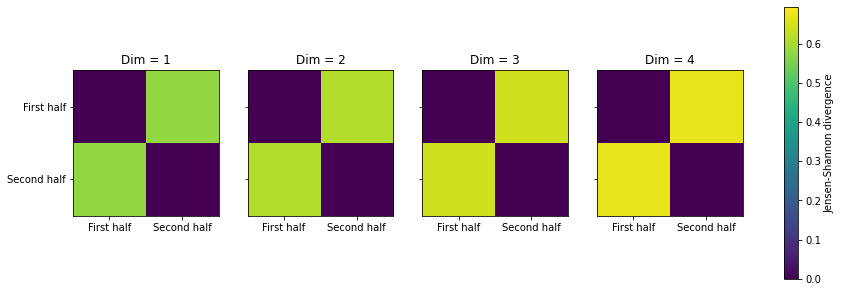

In [52]:
titles = ['Dim = {}'.format(n) for n in range(1, 5)]
fig2, axes = plt.subplots(1, 4, sharey=True, figsize=(15, 5))


for i, (data, title) in enumerate(zip(dres2, titles)):
    
    imi = axes[i].imshow(data, vmax=np.log(2), vmin=0)
    axes[i].set_xticks(np.arange(2))
    axes[i].set_xticklabels(labels)
    axes[i].set_title(title)
plt.yticks(np.arange(2), labels)
cbar2 = fig2.colorbar(imi, ax=axes.ravel().tolist())
cbar2.set_label('Jensen-Shannon divergence')

<p>Mathematicly, cluster analysis and dimensionality reduction by means of PCA are equivalent. Therein, one can apply the combined clustering test in a PCA reduction among the first and second halves of the simulation (25 ns each chunk). It is clear that after two PC, there are two blocks of identical conformational ensembles and each of these sampled ensembles are uncorrelated between them (Here we used Jensen-Shannon divergence parameter, which states that a value of 0 corresponds to an identical probability density function and a value of Ln(2) corresponds to no similarity between both ensembles (Here we can see the two uncorrelated blocks, so the simulation is reliable sampling states among the configurational space.</p>

In [53]:
def zip_data_with_labels(reduced):
    rd_split1 = reduced[:, :501]  # first 501 frames
    rd_split2 = reduced[:, 501:(501+500)]  # next 500 frames
    return zip([rd_split1, rd_split2], labels)
rd_p1, rd_p2, rd_p3, rd_p4= details2['reduced_coordinates']

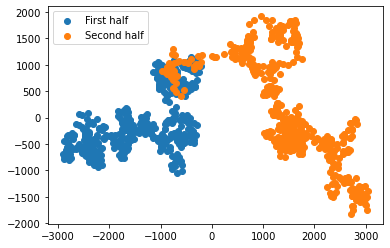

In [54]:
rd_p2_fig, rd_p2_ax = plt.subplots(1,1)
for data, label in zip_data_with_labels(rd_p2):
    rd_p2_ax.scatter(*data, label=label)
plt.legend()

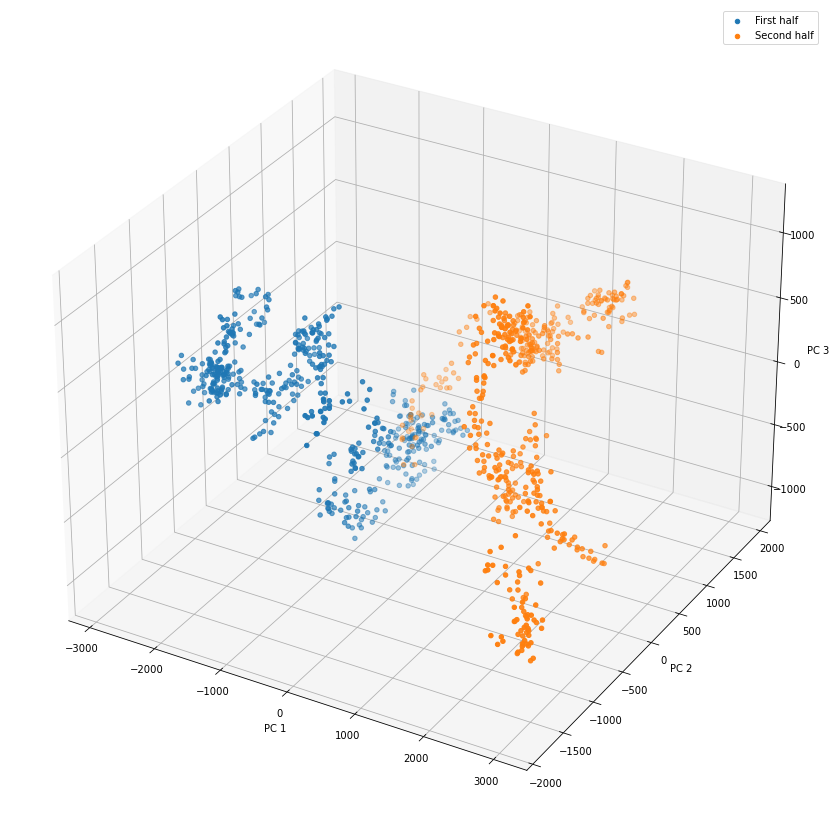

In [55]:

rd_p3_fig = plt.figure(figsize=(15, 15))
rd_p3_ax = rd_p3_fig.add_subplot(111, projection='3d')
for data,label in zip_data_with_labels(rd_p3):
    rd_p3_ax.scatter(*data, label=label)
rd_p3_ax.set_xlabel('PC 1')
rd_p3_ax.set_ylabel('PC 2')
rd_p3_ax.set_zlabel('PC 3')
plt.legend()

<p>As a final check using this test, one can project the trajectories onto the two and three PCs of the dimensionality reduction. It is clear that there is two blocks of data in each half; and each block is uncorrelated with the other. Interestingly, the data is mainly varying among the second PC, so maybe with the three PCs one can capture the most important conformations of the system along the trajectories.</p>

### Global sampling assesment using autocorrelation function

<p>The final step to validate the good sampling of an MD simulation is using the autocorrelation function C(t). The idea behind this is to calculate the correlation between an observable that depends on time against itself and also, against itself after an arbitrary delay. If the correlation is minimal, one can say that the system does not have "memory" along the trajectories and there is a good statistical sampling of the configurational space since each configuration is independent, uncorrelated, and only depends on the delay.</p>

#### Global sampling assesment 

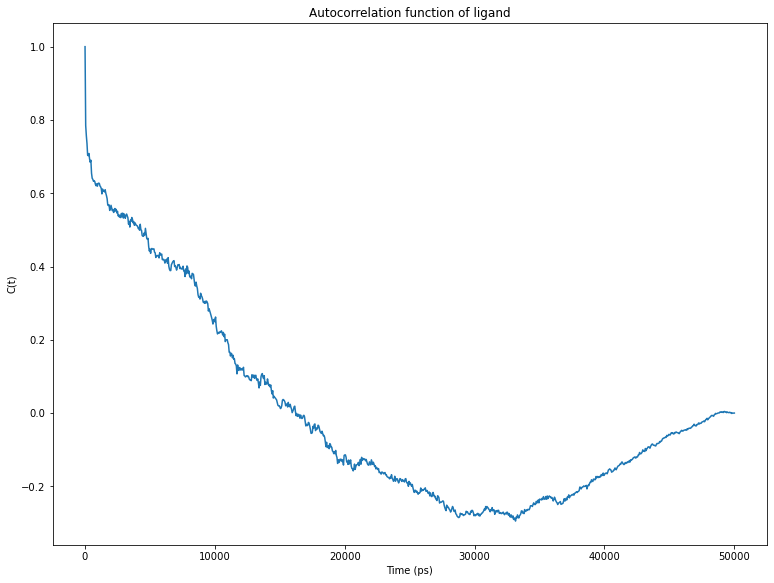

In [17]:
def autocorr(x):
    "Compute an autocorrelation with numpy"
    x = x - np.mean(x)
    result = np.correlate(x, x, mode='full')
    result = result[result.size//2:]
    return result / result[0]

fig = plt.figure(figsize=[12.8, 9.6])
plt.plot(time, autocorr(rmsd_lig[2]))
plt.xlabel("Time (ps)")
plt.ylabel("C(t)")
plt.title(r"Autocorrelation function of ligand")

matrix_autocorr=time, autocorr(rmsd_lig[2])
autocorr_lig3=pd.DataFrame(matrix_autocorr)
autocorr_lig3=autocorr_lig3.T
autocorr_lig3.columns=['time','c(t)_lig3']
autocorr_lig3
autocorr_lig3.to_csv('autocorr_lig3.csv')

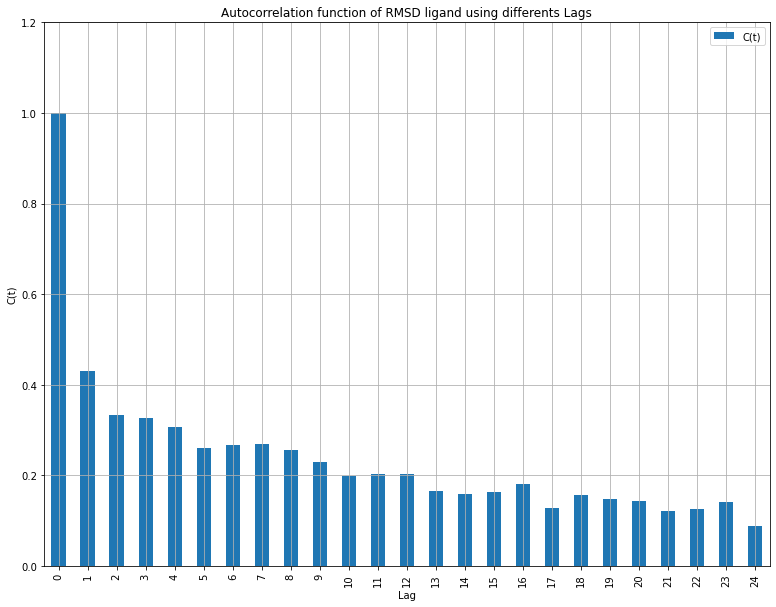

In [60]:
def acf_by_hand(x, lag):
    # Slice the relevant subseries based on the lag
    y1 = x[:(len(x)-lag)]
    y2 = x[lag:]
    # Subtract the mean of the whole series x to calculate Cov
    sum_product = np.sum((y1-np.mean(x))*(y2-np.mean(x)))
    # Normalize with var of whole series
    return sum_product / ((len(x) - lag) * np.var(x))


results = {}
nlags=25
results["C(t)"] = [acf_by_hand(rmsd_lig[2], lag) for lag in range(nlags)]

pd.DataFrame(results).plot(kind="bar", figsize=(13,10), grid=True)
plt.xlabel("Lag")
plt.ylim([0, 1.2])
plt.ylabel("C(t)")
plt.title(r"Autocorrelation function of RMSD ligand using differents Lags")
plt.show()

#### Block sampling assesment 

In [61]:
splitting=[split1,split2]

times_block=[]
backbones_block=[]

for i in splitting:
    block_rms=MDAnalysis.analysis.rms.RMSD(i, i,select="resname MOL")                                   
    block_rms.run()
    total_block=block_rms.rmsd.T
    
    time_block=total_block[1]
    times_block.append(time_block)
    backbone_block=total_block[2]
    backbones_block.append(backbone_block)

/home/edward/anaconda3/envs/AmberTools20/lib/python3.9/site-packages/MDAnalysis/core/selection.py:521: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  mask = np.zeros(len(group), dtype=np.bool)


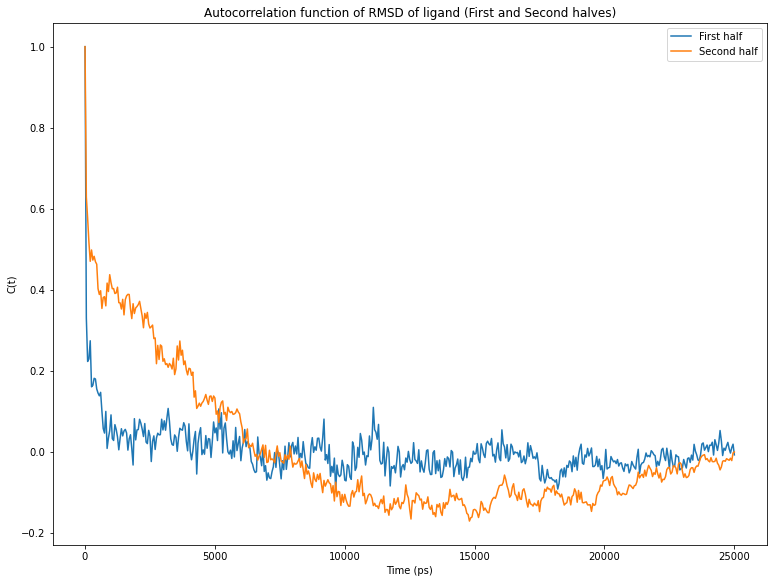

In [63]:
def autocorr(x):
    "Compute an autocorrelation with numpy"
    x = x - np.mean(x)
    result = np.correlate(x, x, mode='full')
    result = result[result.size//2:]
    return result / result[0]

fig = plt.figure(figsize=[12.8, 9.6])
plt.plot(times_block[0], autocorr(backbones_block[0]))
plt.plot(times_block[1], autocorr(backbones_block[1]))
plt.xlabel("Time (ps)")
plt.ylabel("C(t)")
plt.title(r"Autocorrelation function of RMSD of ligand (First and Second halves)")
plt.legend(['First half', 'Second half'])

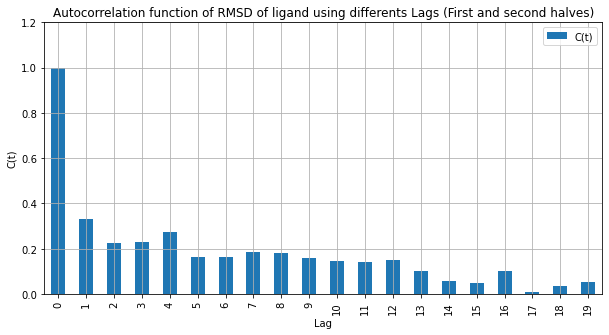

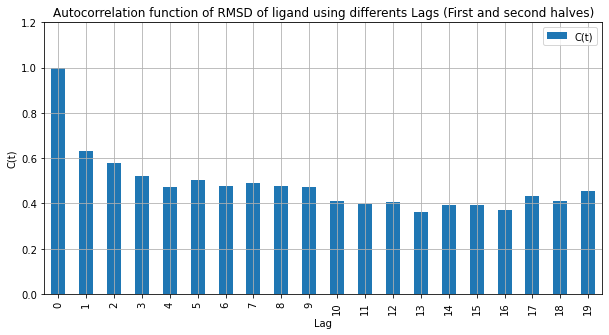

In [64]:
def acf_by_hand(x, lag):
    # Slice the relevant subseries based on the lag
    y1 = x[:(len(x)-lag)]
    y2 = x[lag:]
    # Subtract the mean of the whole series x to calculate Cov
    sum_product = np.sum((y1-np.mean(x))*(y2-np.mean(x)))
    # Normalize with var of whole series
    return sum_product / ((len(x) - lag) * np.var(x))

for i in backbones_block:
    results = {}
    nlags=20
    results["C(t)"] = [acf_by_hand(i, lag) for lag in range(nlags)]

    pd.DataFrame(results).plot(kind="bar", figsize=(10,5), grid=True)
    plt.xlabel("Lag")
    plt.ylim([0, 1.2])
    plt.ylabel("C(t)")
    plt.title(r"Autocorrelation function of RMSD of ligand using differents Lags (First and second halves)")
    plt.show()     

<p>According to literature, estimates of autocorrelation that are independent of blocks through an arbitrary number of delays, suggest an equilibrated//steady-state system with a well-behaved sampling. Qualitatively, our simulation reasonably fulfills all of the above tests. The final step is to discard the transient time of the first 10 ns according to the RMSD plot and after that, we have confidence in all the structural, dynamical, and thermodynamical parameters estimated from this simulation.</p>

# Structural analysis

### Root mean square fluctuation of the atoms of the residues of the protein (RMSF)

<p>The RMSF is a qualitative measure of the deviation of the position of the atoms in the system by a time average. Formally, is the <b>euclidean distance in configuration space of the current configuration (after appropiate translation and rotation transformations) from a reference configuration averaged over time</b>.</p>

In [18]:
from MDAnalysis.analysis.rms import RMSF

calphas = u_ana.select_atoms("name CA")
rmsfer = RMSF(calphas, verbose=True).run()

rmsf_lig3=calphas.resnums, rmsfer.rmsf
rmsf_lig3=pd.DataFrame(rmsf_lig3)
rmsf_lig3=rmsf_lig3.T
rmsf_lig3.columns=['res_num','rmsf_lig3']
rmsf_lig3
rmsf_lig3.to_csv('rmsf_lig3.csv')
rmsf_lig3

  0%|          | 0/1001 [00:00<?, ?it/s]

res_num  rmsf_lig3
0       17.0  20.334641
1       18.0  19.866870
2       19.0  19.784664
3       20.0  20.201272
4       21.0  20.519010
..       ...        ...
890    907.0  19.498317
891    908.0  20.023689
892    909.0  20.577946
893    910.0  20.427888
894    911.0  20.817134

[895 rows x 2 columns]

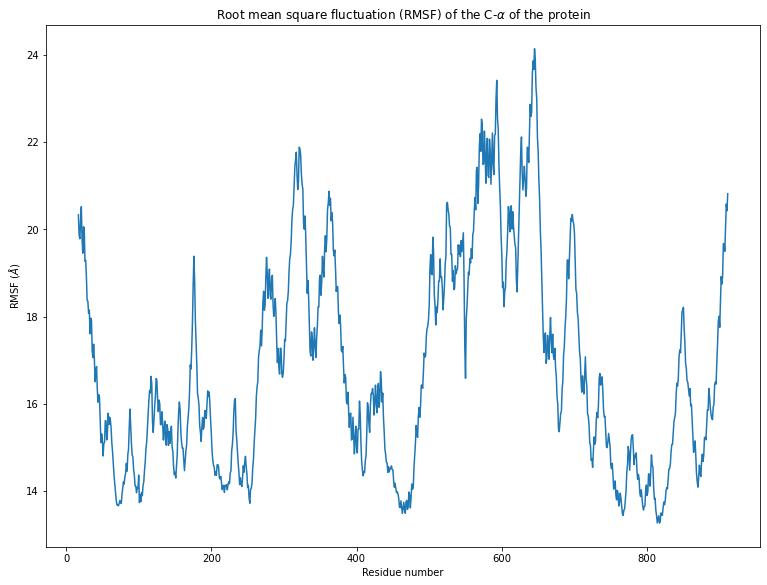

In [19]:
%matplotlib inline
fig = plt.figure(figsize=[12.8, 9.6])
ax = fig.add_subplot(111)
plt.plot(calphas.resnums, rmsfer.rmsf)
ax.set_title(r"Root mean square fluctuation (RMSF) of the C-$\alpha$ of the protein")    
ax.set_xlabel("Residue number")
ax.set_ylabel(r"RMSF ($\AA$)")
plt.show()

<p>Here, one can see residues with high displacement alog the simulation, specially the region between 100 to 200 residues, 250 to 350 residues, and 500 to 600 residues. Interestingly, the interacting residues according to 5HEX relies from 150 to 250 residues in the N-term. And 650 to 850 in te C-term. So there is a lot of fluctuation in the residues of the N-ten compared with the C-term. This is expected since the C-term is being occupied by the ligand. So, what implications have these change in fluctuation of the side chains? What is the impact of the loss of configurational degrees of freedom in the side chains when the ligand is binded?</p>

### Radius of gyration

<p>The radius of gyration is a measure of the compactness of a structure. Formally is the sum of the position and masses of the atoms of the structure, relative to a arbitrary center of mass. This measure gives the radial distance to the center of mass chosen.</p>

In [67]:
import numpy.linalg

nterm = u_ana.select_atoms('protein and name N')[0]   # Takes the first atom named 'N'
cterm = u_ana.select_atoms('protein and name C')[-1]  # Takes the last atom named 'C'
bb = u_ana.select_atoms('protein and backbone')  # A selection (a AtomGroup)
for ts in u_ana.trajectory:  # Iterate through all frames
    r = (cterm.position - nterm.position)  # End-to-end vector from atom positions
    d = numpy.linalg.norm(r)   # End-to-end distance
    rgyr = bb.radius_of_gyration()  # Method of a AtomGroup; updates with each frame
    print("frame = %d: d = %f Angstroem, Rgyr = %f Angstroem" % (ts.frame, d, rgyr))

/home/edward/anaconda3/envs/AmberTools20/lib/python3.9/site-packages/MDAnalysis/core/selection.py:521: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  mask = np.zeros(len(group), dtype=np.bool)


frame = 0: d = 114.773262 Angstroem, Rgyr = 39.212748 Angstroem
frame = 1: d = 115.314064 Angstroem, Rgyr = 39.533428 Angstroem
frame = 2: d = 113.771843 Angstroem, Rgyr = 39.413282 Angstroem
frame = 3: d = 115.652832 Angstroem, Rgyr = 39.416692 Angstroem
frame = 4: d = 116.620041 Angstroem, Rgyr = 39.503684 Angstroem
frame = 5: d = 115.301567 Angstroem, Rgyr = 39.308524 Angstroem
frame = 6: d = 116.065536 Angstroem, Rgyr = 39.505514 Angstroem
frame = 7: d = 113.362808 Angstroem, Rgyr = 39.396953 Angstroem
frame = 8: d = 115.440956 Angstroem, Rgyr = 39.382416 Angstroem
frame = 9: d = 115.524460 Angstroem, Rgyr = 39.374211 Angstroem
frame = 10: d = 112.273132 Angstroem, Rgyr = 39.602793 Angstroem
frame = 11: d = 112.029556 Angstroem, Rgyr = 39.367174 Angstroem
frame = 12: d = 114.841316 Angstroem, Rgyr = 39.409496 Angstroem
frame = 13: d = 113.850983 Angstroem, Rgyr = 39.422930 Angstroem
frame = 14: d = 111.628441 Angstroem, Rgyr = 39.416516 Angstroem
frame = 15: d = 112.264595 Angstroe

frame = 471: d = 115.078842 Angstroem, Rgyr = 40.045700 Angstroem
frame = 472: d = 117.400803 Angstroem, Rgyr = 40.092517 Angstroem
frame = 473: d = 115.868073 Angstroem, Rgyr = 40.352159 Angstroem
frame = 474: d = 118.059822 Angstroem, Rgyr = 39.951040 Angstroem
frame = 475: d = 117.386650 Angstroem, Rgyr = 39.982379 Angstroem
frame = 476: d = 115.905144 Angstroem, Rgyr = 39.951937 Angstroem
frame = 477: d = 115.874382 Angstroem, Rgyr = 39.800473 Angstroem
frame = 478: d = 113.519417 Angstroem, Rgyr = 39.846014 Angstroem
frame = 479: d = 113.724464 Angstroem, Rgyr = 39.950503 Angstroem
frame = 480: d = 115.308357 Angstroem, Rgyr = 40.192220 Angstroem
frame = 481: d = 114.780838 Angstroem, Rgyr = 40.058466 Angstroem
frame = 482: d = 115.704742 Angstroem, Rgyr = 39.870609 Angstroem
frame = 483: d = 113.963371 Angstroem, Rgyr = 39.602398 Angstroem
frame = 484: d = 115.776497 Angstroem, Rgyr = 40.012416 Angstroem
frame = 485: d = 115.088478 Angstroem, Rgyr = 39.944575 Angstroem
frame = 48

frame = 946: d = 108.938591 Angstroem, Rgyr = 39.050781 Angstroem
frame = 947: d = 110.064781 Angstroem, Rgyr = 39.102103 Angstroem
frame = 948: d = 109.827393 Angstroem, Rgyr = 39.127583 Angstroem
frame = 949: d = 111.242302 Angstroem, Rgyr = 39.124485 Angstroem
frame = 950: d = 109.885773 Angstroem, Rgyr = 38.872000 Angstroem
frame = 951: d = 109.087433 Angstroem, Rgyr = 38.973467 Angstroem
frame = 952: d = 109.456459 Angstroem, Rgyr = 38.854900 Angstroem
frame = 953: d = 109.887978 Angstroem, Rgyr = 39.027996 Angstroem
frame = 954: d = 109.579178 Angstroem, Rgyr = 38.780926 Angstroem
frame = 955: d = 108.052475 Angstroem, Rgyr = 38.856201 Angstroem
frame = 956: d = 108.518501 Angstroem, Rgyr = 39.199649 Angstroem
frame = 957: d = 108.081772 Angstroem, Rgyr = 38.895858 Angstroem
frame = 958: d = 112.752693 Angstroem, Rgyr = 38.956376 Angstroem
frame = 959: d = 110.797295 Angstroem, Rgyr = 39.137424 Angstroem
frame = 960: d = 108.401825 Angstroem, Rgyr = 38.966909 Angstroem
frame = 96

In [68]:
Rgyr = []
protein = u_ana.select_atoms("protein")
for ts in u_ana.trajectory:
   Rgyr.append((u_ana.trajectory.time, protein.radius_of_gyration()))
Rgyr = np.array(Rgyr)

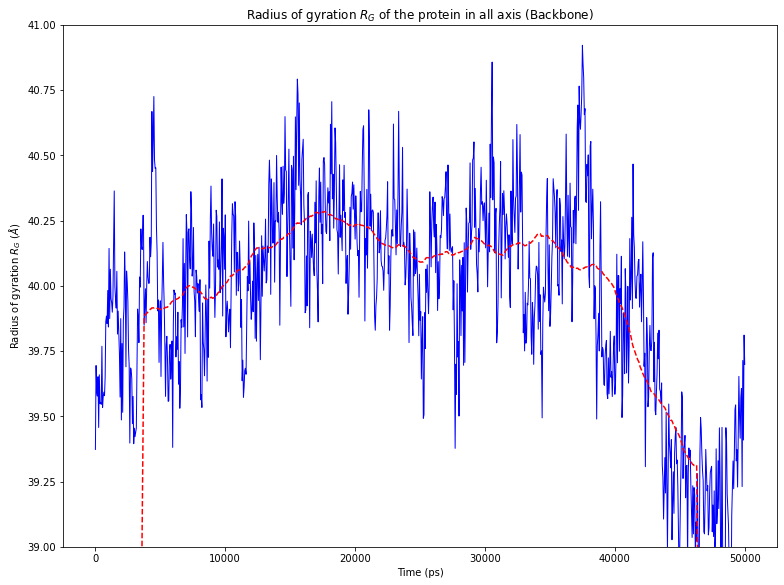

In [69]:
%matplotlib inline
fig = plt.figure(figsize=[12.8, 9.6])
ax = plt.subplot(111)
ax.plot(Rgyr[:,0], Rgyr[:,1], 'b-', lw=1, label=r"$R_G$")
ax.set_title(r"Radius of gyration $R_G$ of the protein in all axis (Backbone)") 
ax.plot(Rgyr[:,0],moving_average(Rgyr[:,1],150), label='Average convolution radius of gyration', linestyle='--',c='r')
ax.set_xlabel("Time (ps)")
ax.set_ylabel(r"Radius of gyration $R_G$ ($\AA$)")
plt.ylim(39,41)
plt.draw()

## Distance analysis

In [95]:
##Checking structures
nv.show_mdanalysis(mda.Universe('md_0_10_ana.gro'),gui=True)

/home/edward/anaconda3/envs/AmberTools20/lib/python3.9/site-packages/MDAnalysis/topology/base.py:203: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  residx = np.zeros_like(criteria[0], dtype=np.int)


NGLWidget()

# Structural analysis

## Catalytic residue K621

<p>Experimentally, this residue is key for the catalysis of HK2. Here we measure the number of contacts along the simulation between this residue and the ligand</p>

In [6]:
##Number of contacts within a cutoff
def contacts_within_cutoff(u_ana,group_a,group_b,radius=4.0):
    timeseries=[]
    for ts in u_ana.trajectory:
        dist=contacts.distance_array(group_a.positions,group_b.positions)
        n_contacts=contacts.contact_matrix(dist,radius).sum()
        timeseries.append([ts.time,n_contacts])
    return np.array(timeseries)

In [7]:
from MDAnalysis.analysis import contacts


K621=u_ana.select_atoms("(resid 621) and (name NZ)")
Res_LIG=u_ana.select_atoms("resname MOL")

In [8]:
frac_contc=contacts_within_cutoff(u_ana, K621,Res_LIG)
frac_contc.shape

(1001, 2)

In [10]:
frac_contc_df=pd.DataFrame(frac_contc,columns=['Time','Number of contacts'])
frac_contc_K621=frac_contc_df.copy()
frac_contc_K621.to_csv('K621_LIG3.csv')
frac_contc_K621

Time  Number of contacts
0         0.0                 8.0
1        50.0                 7.0
2       100.0                 5.0
3       150.0                 6.0
4       200.0                 3.0
...       ...                 ...
996   49800.0                 6.0
997   49850.0                 5.0
998   49900.0                 5.0
999   49950.0                 4.0
1000  50000.0                 7.0

[1001 rows x 2 columns]

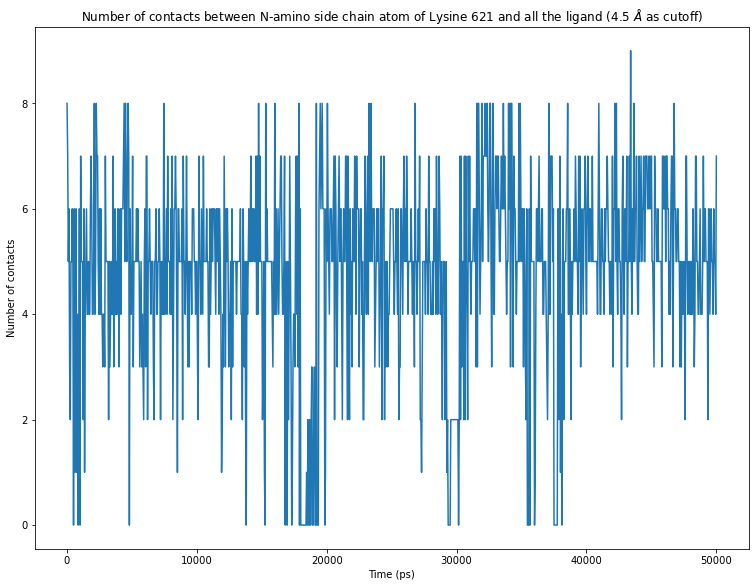

In [11]:
fig = plt.figure(figsize=[12.8, 9.6])

plt.plot(frac_contc_K621['Time'],frac_contc_K621['Number of contacts'])
plt.xlabel("Time (ps)")
plt.ylabel("Number of contacts")
plt.title(r"Number of contacts between N-amino side chain atom of Lysine 621 and all the ligand (4.5 $\AA$ as cutoff)")
plt.show()    

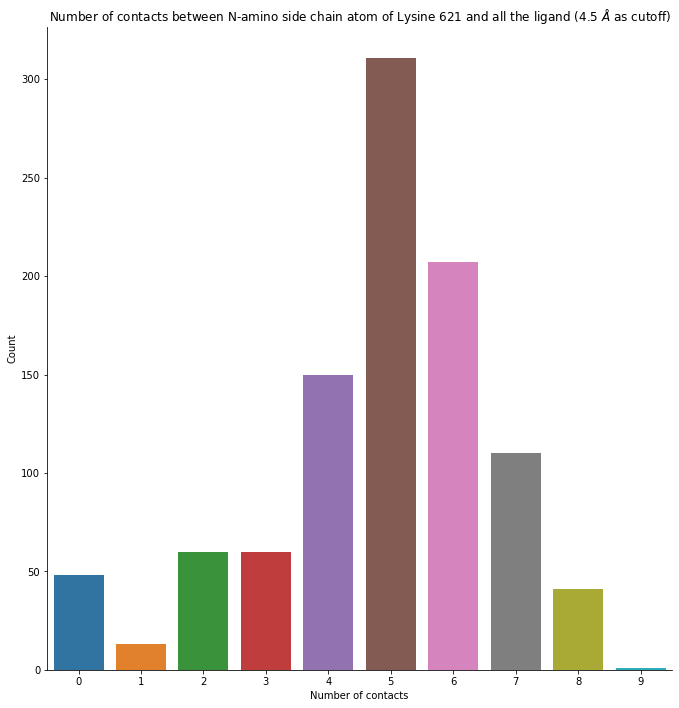

In [12]:
frac_contc_df['Number of contacts']=frac_contc_df['Number of contacts'].astype(int)
g=sns.catplot(data=frac_contc_df,x='Number of contacts',kind='count')
g.fig.set_size_inches(10,10)
plt.xlabel("Number of contacts")
plt.ylabel("Count")
plt.title(r"Number of contacts between N-amino side chain atom of Lysine 621 and all the ligand (4.5 $\AA$ as cutoff)")
plt.show()   

## Catalytic and binding residue E708

<p>Experimentally, this residue is key for the binding and catalysis of HK2. Here we measure the number of contacts along the simulation between this residue and the ligand</p>

In [17]:
from MDAnalysis.analysis import contacts


E708=u_ana.select_atoms("(resid 708) and (name OE1 OE2)")
Res_LIG=u_ana.select_atoms("resname MOL")

In [18]:
frac_contc_2=contacts_within_cutoff(u_ana, E708,Res_LIG)
frac_contc_2.shape

(1001, 2)

In [19]:
frac_contc_2_df=pd.DataFrame(frac_contc_2,columns=['Time','Number of contacts'])
frac_contc_E708=frac_contc_2_df.copy()
frac_contc_E708.to_csv('E708_LIG3.csv')
frac_contc_E708

Time  Number of contacts
0         0.0                 8.0
1        50.0                14.0
2       100.0                13.0
3       150.0                12.0
4       200.0                14.0
...       ...                 ...
996   49800.0                 7.0
997   49850.0                 8.0
998   49900.0                17.0
999   49950.0                 7.0
1000  50000.0                13.0

[1001 rows x 2 columns]

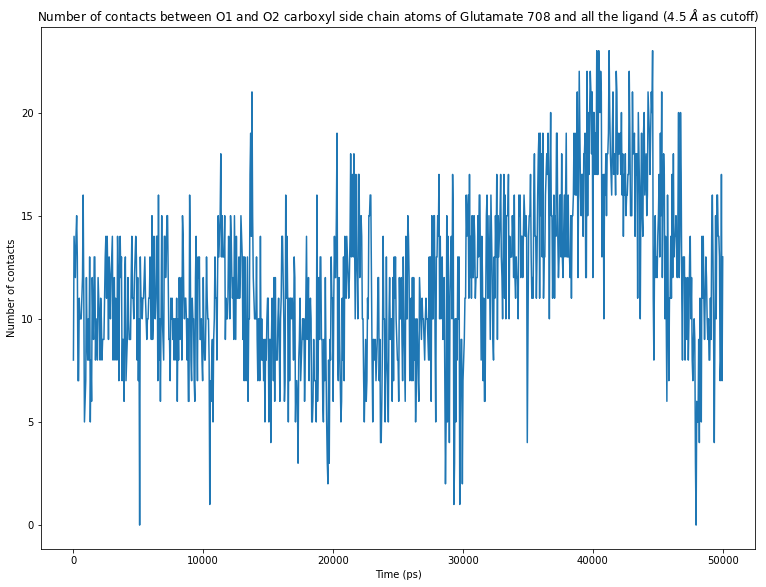

In [20]:
fig = plt.figure(figsize=[12.8, 9.6])

plt.plot(frac_contc_E708['Time'],frac_contc_E708['Number of contacts'])
plt.xlabel("Time (ps)")
plt.ylabel("Number of contacts")
plt.title(r"Number of contacts between O1 and O2 carboxyl side chain atoms of Glutamate 708 and all the ligand (4.5 $\AA$ as cutoff)")
plt.show()  

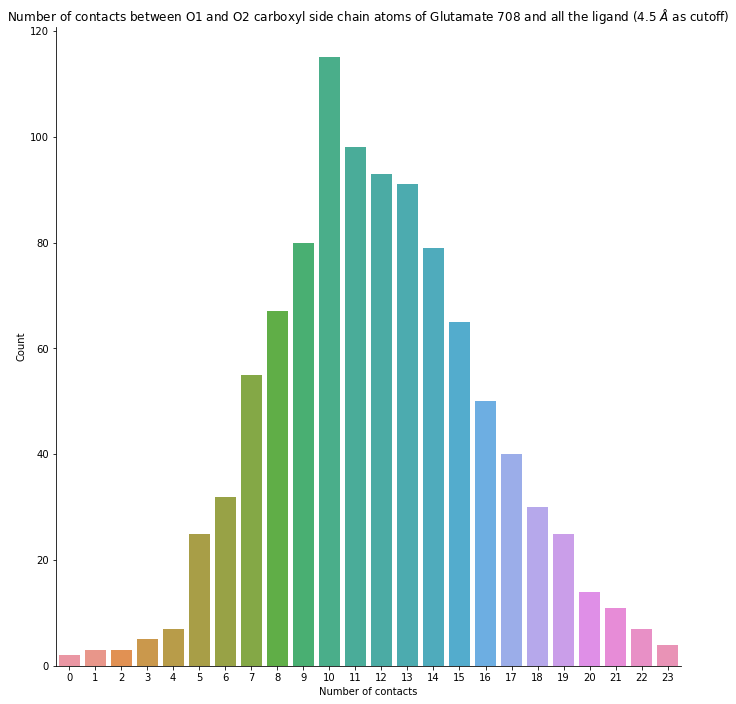

In [21]:
frac_contc_2_df['Number of contacts']=frac_contc_2_df['Number of contacts'].astype(int)
g=sns.catplot(data=frac_contc_2_df,x='Number of contacts',kind='count')
g.fig.set_size_inches(10,10)
plt.xlabel("Number of contacts")
plt.ylabel("Count")
plt.title(r"Number of contacts between O1 and O2 carboxyl side chain atoms of Glutamate 708 and all the ligand (4.5 $\AA$ as cutoff)")
plt.show() 

## Binding residue P605

<p>This residue is important in hydrophobic interaction of inhibitor (hydrophobic pocket according to Lin et al.)</p>

In [22]:
from MDAnalysis.analysis import contacts


P605=u_ana.select_atoms("(resid 605) and (name CG CB)")
Res_LIG=u_ana.select_atoms("resname MOL")

In [23]:
frac_contc_3=contacts_within_cutoff(u_ana, P605,Res_LIG)
frac_contc_3.shape

(1001, 2)

In [24]:
frac_contc_3_df=pd.DataFrame(frac_contc_3,columns=['Time','Number of contacts'])
frac_contc_P605=frac_contc_3_df.copy()
frac_contc_P605.to_csv('P605_LIG3.csv')
frac_contc_P605

Time  Number of contacts
0         0.0                 3.0
1        50.0                 0.0
2       100.0                 1.0
3       150.0                 0.0
4       200.0                 1.0
...       ...                 ...
996   49800.0                 3.0
997   49850.0                 5.0
998   49900.0                 5.0
999   49950.0                 5.0
1000  50000.0                 2.0

[1001 rows x 2 columns]

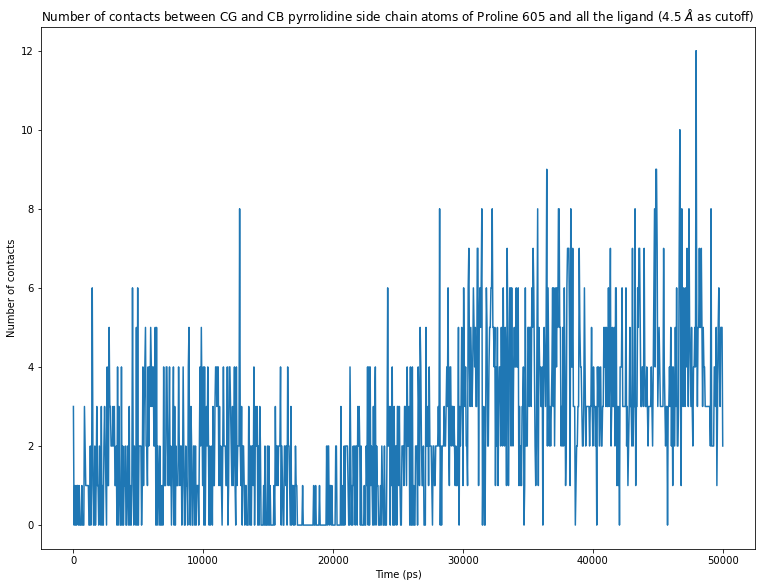

In [25]:
fig = plt.figure(figsize=[12.8, 9.6])

plt.plot(frac_contc_P605['Time'],frac_contc_P605['Number of contacts'])
plt.xlabel("Time (ps)")
plt.ylabel("Number of contacts")
plt.title(r"Number of contacts between CG and CB pyrrolidine side chain atoms of Proline 605 and all the ligand (4.5 $\AA$ as cutoff)")
plt.show()

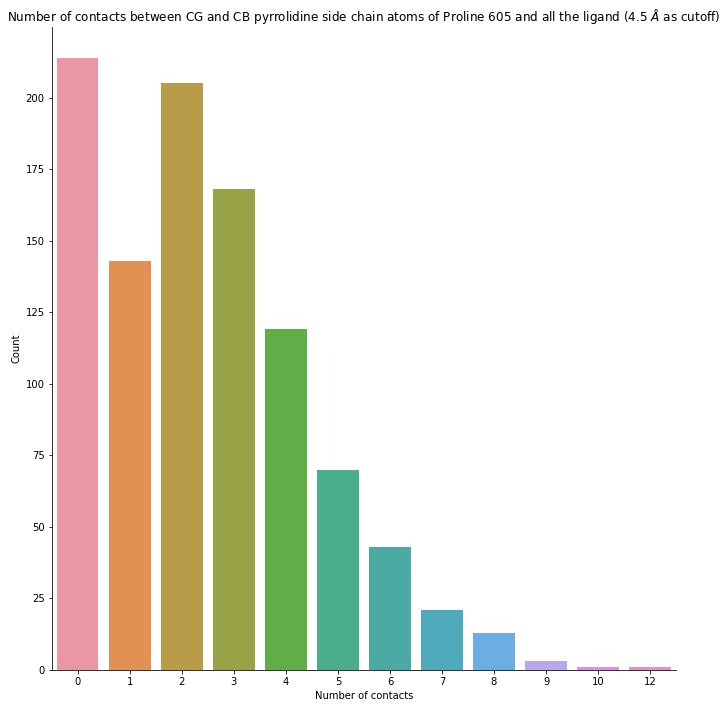

In [26]:
frac_contc_3_df['Number of contacts']=frac_contc_3_df['Number of contacts'].astype(int)
g=sns.catplot(data=frac_contc_3_df,x='Number of contacts',kind='count')
g.fig.set_size_inches(10,10)
plt.xlabel("Number of contacts")
plt.ylabel("Count")
plt.title(r"Number of contacts between CG and CB pyrrolidine side chain atoms of Proline 605 and all the ligand (4.5 $\AA$ as cutoff)")
plt.show()

## Binding residue G739

<p>This residue is important in hydrophobic interaction of inhibitor (hydrophobic pocket according to Lin et al.)</p>

In [29]:
from MDAnalysis.analysis import contacts


G739=u_ana.select_atoms("(resid 739) and (name NE2 CD OE1 CG)")
Res_LIG=u_ana.select_atoms("resname MOL")

In [30]:
frac_contc_4=contacts_within_cutoff(u_ana, G739,Res_LIG)
frac_contc_4.shape

(1001, 2)

In [31]:
frac_contc_4_df=pd.DataFrame(frac_contc_4,columns=['Time','Number of contacts'])
frac_contc_G739=frac_contc_4_df.copy()
frac_contc_G739.to_csv('G739_LIG3.csv')
frac_contc_G739

Time  Number of contacts
0         0.0                 0.0
1        50.0                 0.0
2       100.0                 0.0
3       150.0                 0.0
4       200.0                 0.0
...       ...                 ...
996   49800.0                 0.0
997   49850.0                 0.0
998   49900.0                 0.0
999   49950.0                 0.0
1000  50000.0                 0.0

[1001 rows x 2 columns]

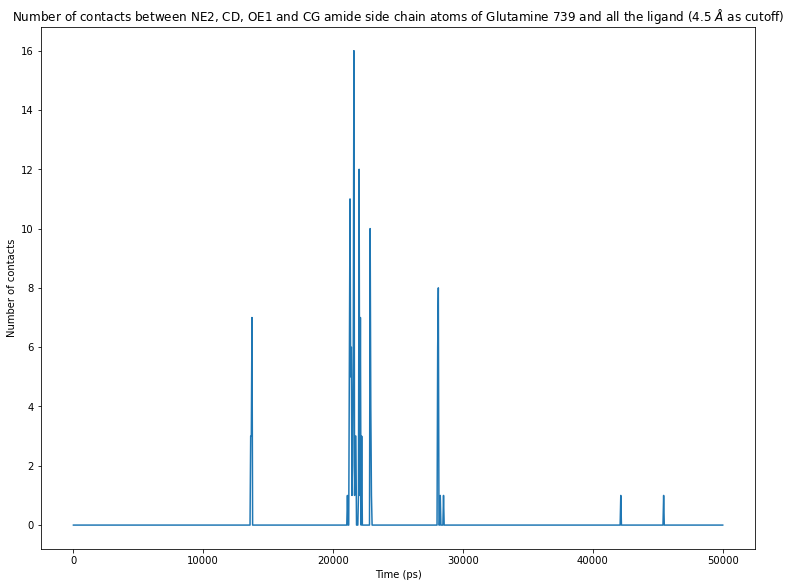

In [32]:
fig = plt.figure(figsize=[12.8, 9.6])

plt.plot(frac_contc_G739['Time'],frac_contc_G739['Number of contacts'])
plt.xlabel("Time (ps)")
plt.ylabel("Number of contacts")
plt.title(r"Number of contacts between NE2, CD, OE1 and CG amide side chain atoms of Glutamine 739 and all the ligand (4.5 $\AA$ as cutoff)")
plt.show() 

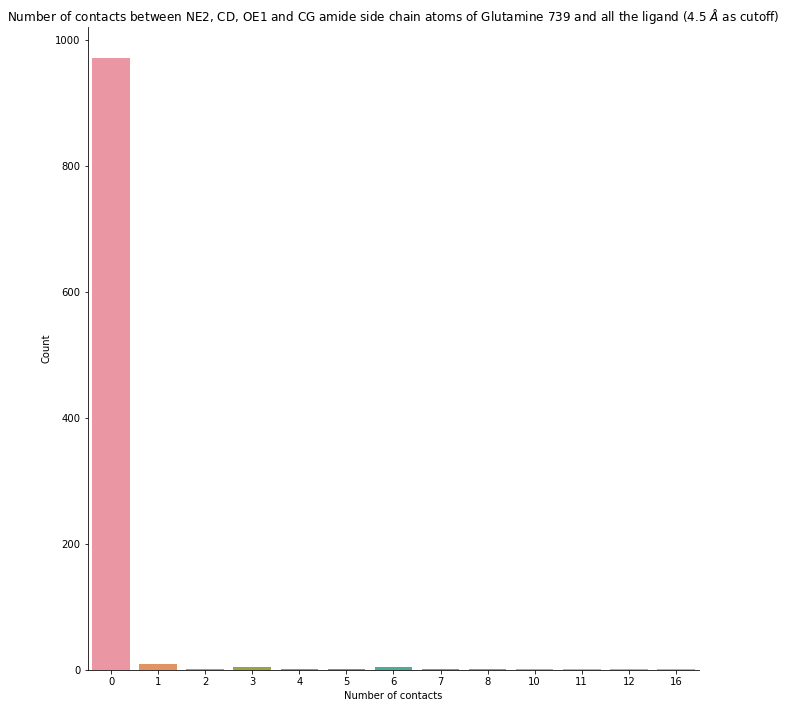

In [33]:
frac_contc_4_df['Number of contacts']=frac_contc_4_df['Number of contacts'].astype(int)
g=sns.catplot(data=frac_contc_4_df,x='Number of contacts',kind='count')
g.fig.set_size_inches(10,10)
plt.xlabel("Number of contacts")
plt.ylabel("Count")
plt.title(r"Number of contacts between NE2, CD, OE1 and CG amide side chain atoms of Glutamine 739 and all the ligand (4.5 $\AA$ as cutoff)")
plt.show() 

## Binding residue T680

<p>This residue is key for phosphate stabilization in Glucose-6-Phosphate allosteric site.</p>

In [34]:
from MDAnalysis.analysis import contacts


T680=u_ana.select_atoms("(resid 680) and (name OG1)")
Res_LIG=u_ana.select_atoms("resname MOL")

In [35]:
frac_contc_5=contacts_within_cutoff(u_ana, T680,Res_LIG)
frac_contc_5.shape

(1001, 2)

In [36]:
frac_contc_5_df=pd.DataFrame(frac_contc_5,columns=['Time','Number of contacts'])
frac_contc_T680=frac_contc_4_df.copy()
frac_contc_T680.to_csv('T680_LIG3.csv')
frac_contc_T680

Time  Number of contacts
0         0.0                   0
1        50.0                   0
2       100.0                   0
3       150.0                   0
4       200.0                   0
...       ...                 ...
996   49800.0                   0
997   49850.0                   0
998   49900.0                   0
999   49950.0                   0
1000  50000.0                   0

[1001 rows x 2 columns]

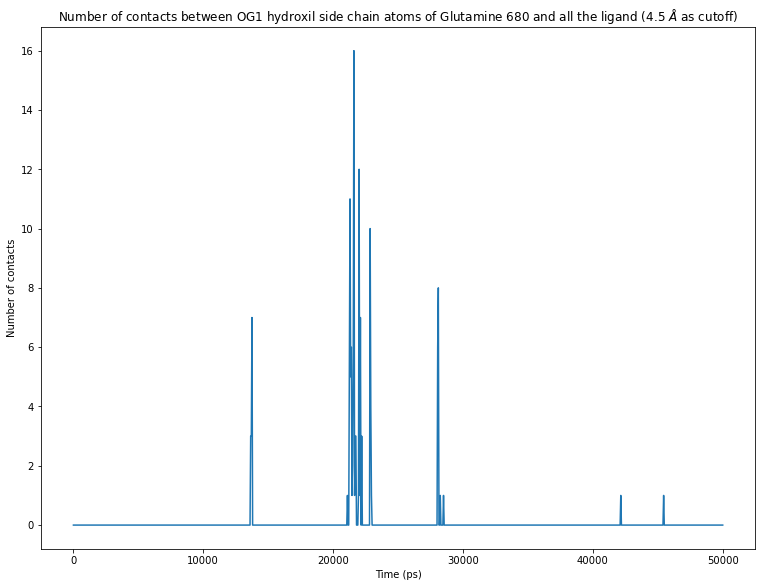

In [37]:
fig = plt.figure(figsize=[12.8, 9.6])

plt.plot(frac_contc_T680['Time'],frac_contc_T680['Number of contacts'])
plt.xlabel("Time (ps)")
plt.ylabel("Number of contacts")
plt.title(r"Number of contacts between OG1 hydroxil side chain atoms of Glutamine 680 and all the ligand (4.5 $\AA$ as cutoff)")
plt.show()

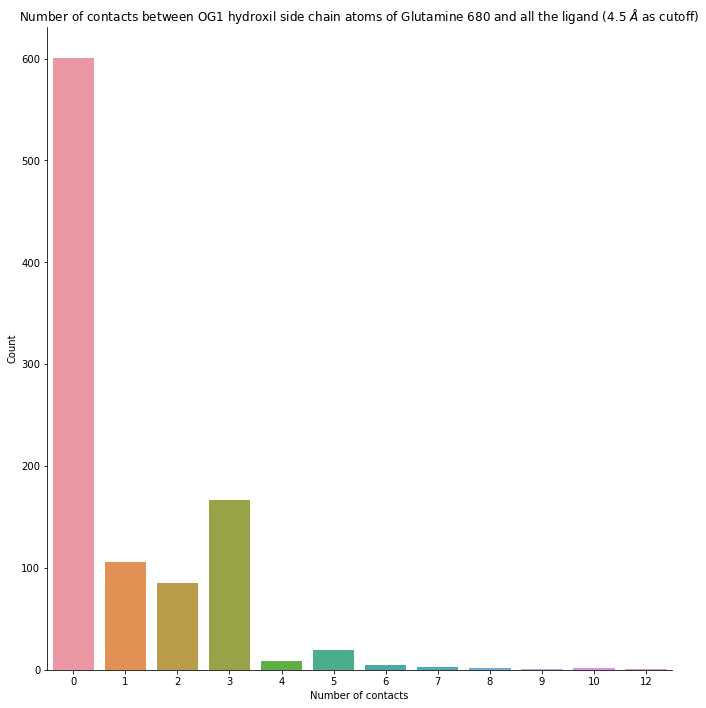

In [38]:
frac_contc_5_df['Number of contacts']=frac_contc_5_df['Number of contacts'].astype(int)
g=sns.catplot(data=frac_contc_5_df,x='Number of contacts',kind='count')
g.fig.set_size_inches(10,10)
plt.xlabel("Number of contacts")
plt.ylabel("Count")
plt.title(r"Number of contacts between OG1 hydroxil side chain atoms of Glutamine 680 and all the ligand (4.5 $\AA$ as cutoff)")
plt.show() 

# Thermodynamic analysis

<p>Since there's a reliability to recover thermodynamic information from the simulations, here MM-PB(GB)SA-IE will be used to calculate an affinity between the ligand and the protein. Using suggestions from literature, approximately 500 snapshots will be used (from 30 to 50 ns) and with a dt of 60 ps (guaranteeing that there is no correlation between snapshots according to autocorrelation time analysis).</p>

In [3]:
from GMXMMPBSA import API as gmxMMPBSAapi

In [4]:
data = gmxMMPBSAapi.load_gmxmmpbsa_info('_GMXMMPBSA_info')

In [5]:
#%%bash
#gmx_MMPBSA -O -i mmpbsa.in -cs md_0_10.tpr -ci index_mmpbsa.ndx -cg 1 13 -ct md_0_10_mmpbsa.xtc -lm oxls.mol2 -eo output


In [6]:
delta=pd.DataFrame(data[0]['gb']['delta'])
receptor=pd.DataFrame(data[0]['gb']['receptor'])
ligand=pd.DataFrame(data[0]['gb']['ligand'])
complejo=pd.DataFrame(data[0]['gb']['complex'])
entropia=pd.DataFrame(data[0]['ie']['data'])

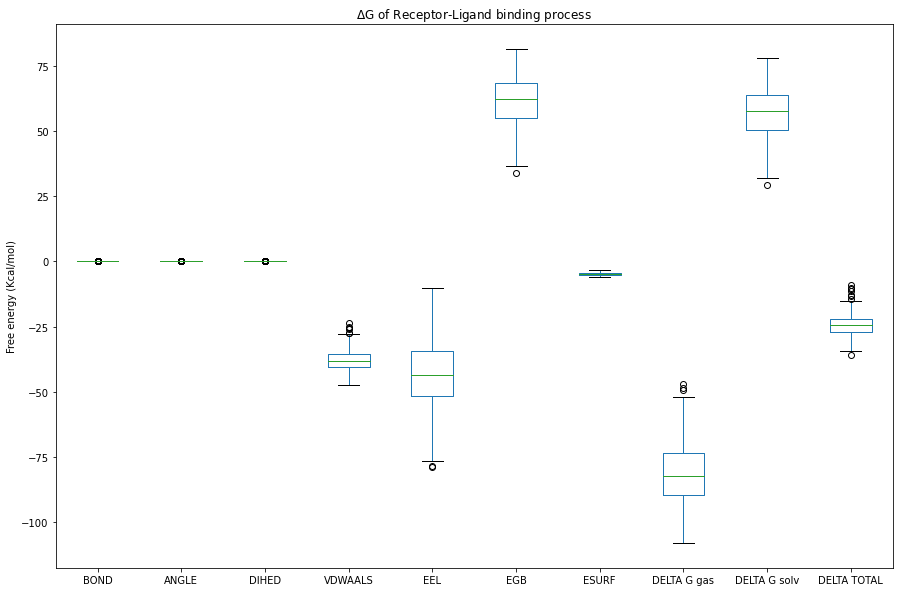

In [7]:
delta[['BOND','ANGLE','DIHED','VDWAALS','EEL','EGB','ESURF','DELTA G gas','DELTA G solv', 'DELTA TOTAL']].plot(ylabel='Free energy (Kcal/mol)',title=r'$\Delta$G of Receptor-Ligand binding process',kind='box',figsize=[15, 10])
plt.show()

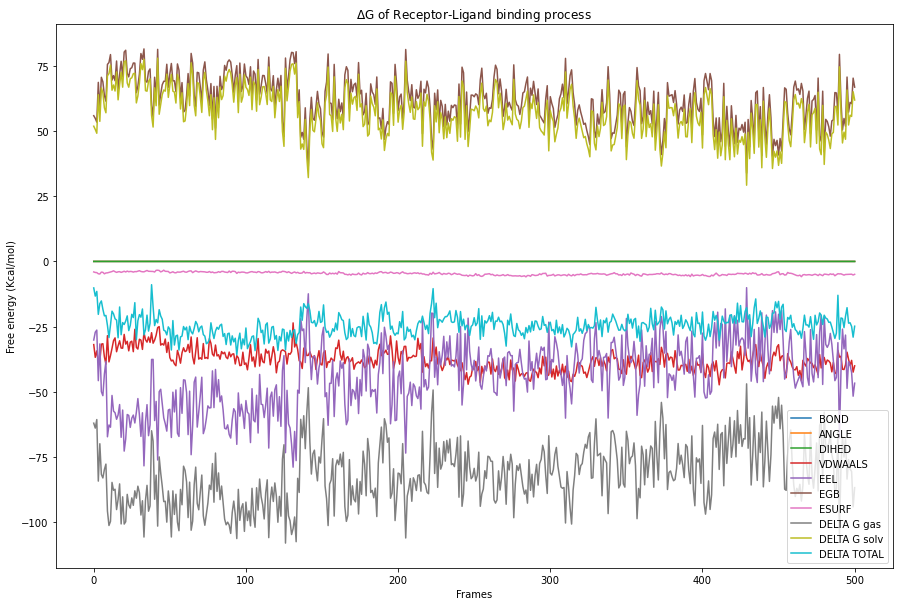

In [8]:
delta[['BOND','ANGLE','DIHED','VDWAALS','EEL','EGB','ESURF','DELTA G gas','DELTA G solv', 'DELTA TOTAL']].plot(ylabel='Free energy (Kcal/mol)',title=r'$\Delta$G of Receptor-Ligand binding process',xlabel='Frames',figsize=[15, 10])
plt.show()

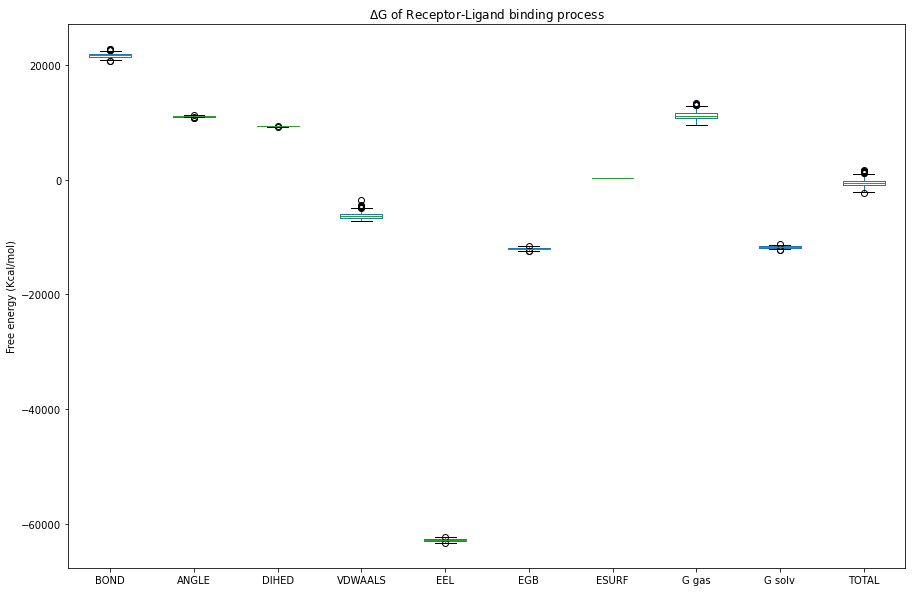

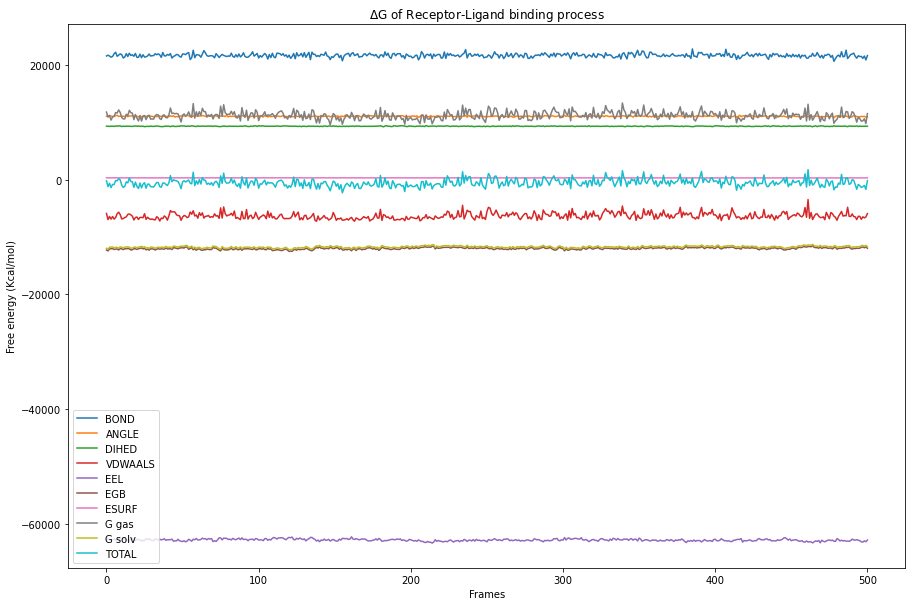

In [9]:
complejo[['BOND','ANGLE','DIHED','VDWAALS','EEL','EGB','ESURF','G gas','G solv', 'TOTAL']].plot(ylabel='Free energy (Kcal/mol)',title=r'$\Delta$G of Receptor-Ligand binding process',kind='box',figsize=[15, 10])
complejo[['BOND','ANGLE','DIHED','VDWAALS','EEL','EGB','ESURF','G gas','G solv', 'TOTAL']].plot(ylabel='Free energy (Kcal/mol)',title=r'$\Delta$G of Receptor-Ligand binding process',xlabel='Frames',figsize=[15, 10])
plt.show()

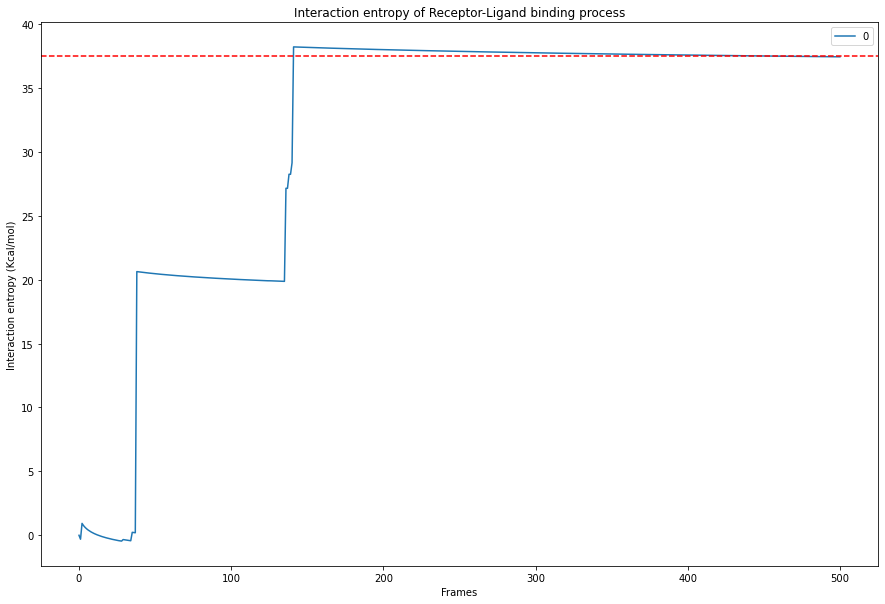

In [10]:
entropia.plot(ylabel='Interaction entropy (Kcal/mol)',title=r'Interaction entropy of Receptor-Ligand binding process',xlabel='Frames',figsize=[15, 10])
entropia.columns=['Interaction entropy']
plt.axhline(y=data[0]['ie']['value'], color='r', linestyle='--')

<AxesSubplot:title={'center':'$\\Delta$G energy decomposition of Receptor-Ligand binding process'}, ylabel='Energy (Kcal/mol)'>

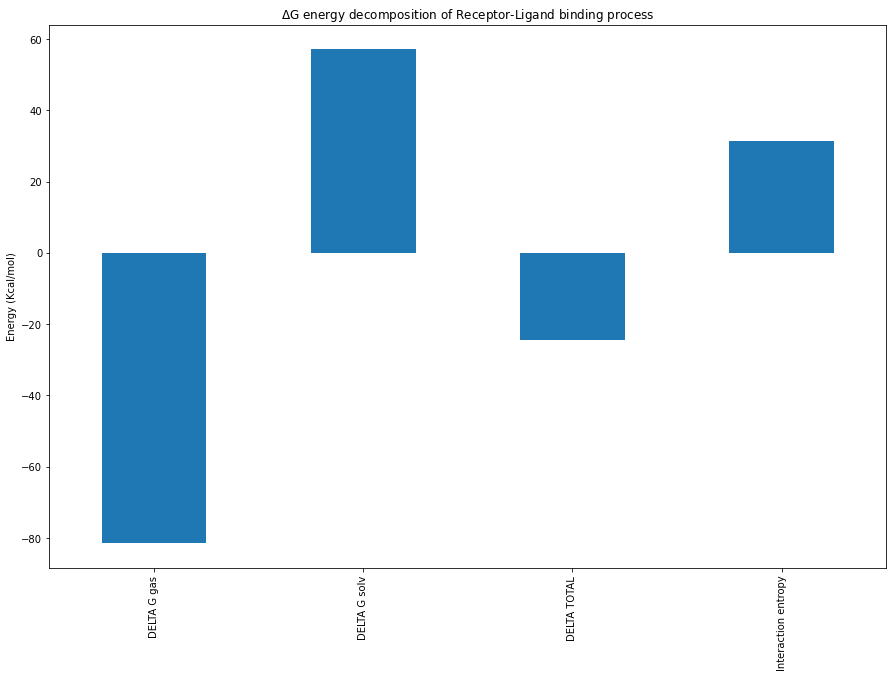

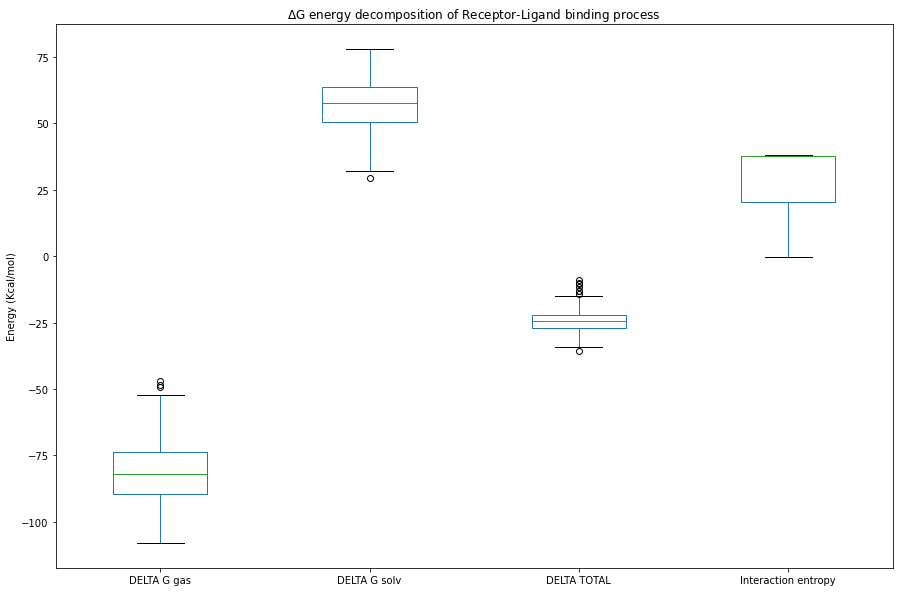

In [11]:
delta_parcial = pd.concat([delta[['BOND','ANGLE','DIHED','VDWAALS','EEL','EGB','ESURF','DELTA G gas','DELTA G solv', 'DELTA TOTAL']],entropia],axis=1)
delta_parcial[['DELTA G gas','DELTA G solv', 'DELTA TOTAL','Interaction entropy']].mean().plot(ylabel='Energy (Kcal/mol)',title=r'$\Delta$G energy decomposition of Receptor-Ligand binding process',kind='bar',figsize=[15, 10])
delta_parcial[['DELTA G gas','DELTA G solv', 'DELTA TOTAL','Interaction entropy']].plot(ylabel='Energy (Kcal/mol)',title=r'$\Delta$G energy decomposition of Receptor-Ligand binding process',kind='box',figsize=[15, 10])


In [12]:
delta_total=delta_parcial[['DELTA TOTAL','Interaction entropy']]
delta_total.columns=['Enthalpy (dH)','Interaction entropy (-TdS)']
delta_total['Total free energy (dG)'] = delta_total['Enthalpy (dH)'] + delta_total['Interaction entropy (-TdS)']
delta_total

/tmp/ipykernel_8996/3236776303.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  delta_total['Total free energy (dG)'] = delta_total['Enthalpy (dH)'] + delta_total['Interaction entropy (-TdS)']


Enthalpy (dH)  Interaction entropy (-TdS)  Total free energy (dG)
0       -10.160064                    0.000000              -10.160064
1       -13.293274                   -0.306960              -13.600234
2       -11.490280                    0.931558              -10.558722
3       -20.303628                    0.754369              -19.549260
4       -16.189191                    0.619516              -15.569674
..             ...                         ...                     ...
496     -23.671960                   37.436854               13.764895
497     -23.528553                   37.435616               13.907064
498     -24.931578                   37.434381               12.502803
499     -29.042909                   37.433148                8.390239
500     -24.840911                   37.431917               12.591006

[501 rows x 3 columns]

<AxesSubplot:title={'center':'$\\Delta$G energy decomposition of Receptor-Ligand binding process taking account entropy'}, ylabel='Energy (Kcal/mol)'>

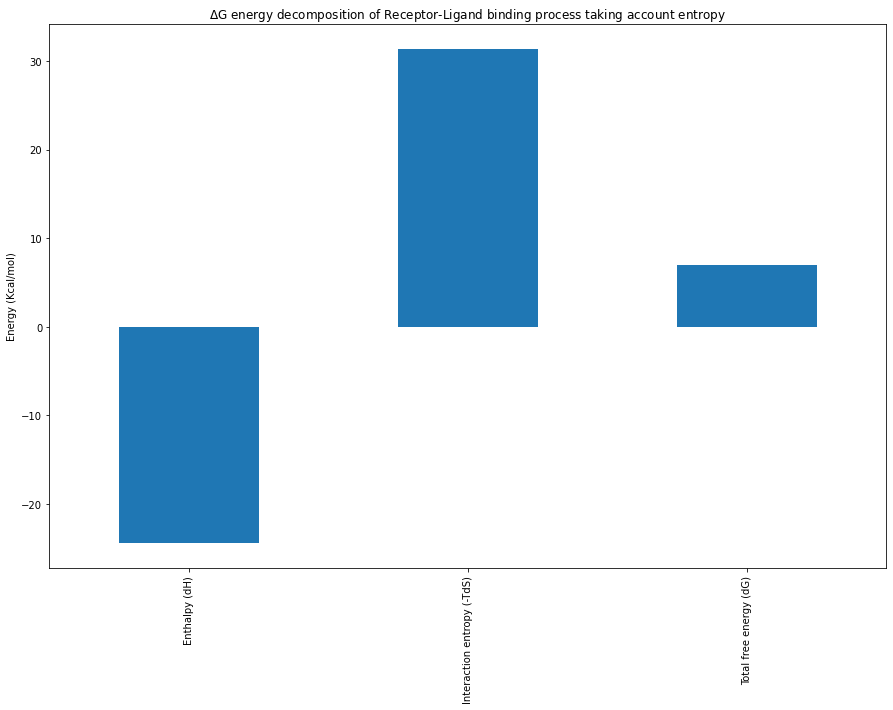

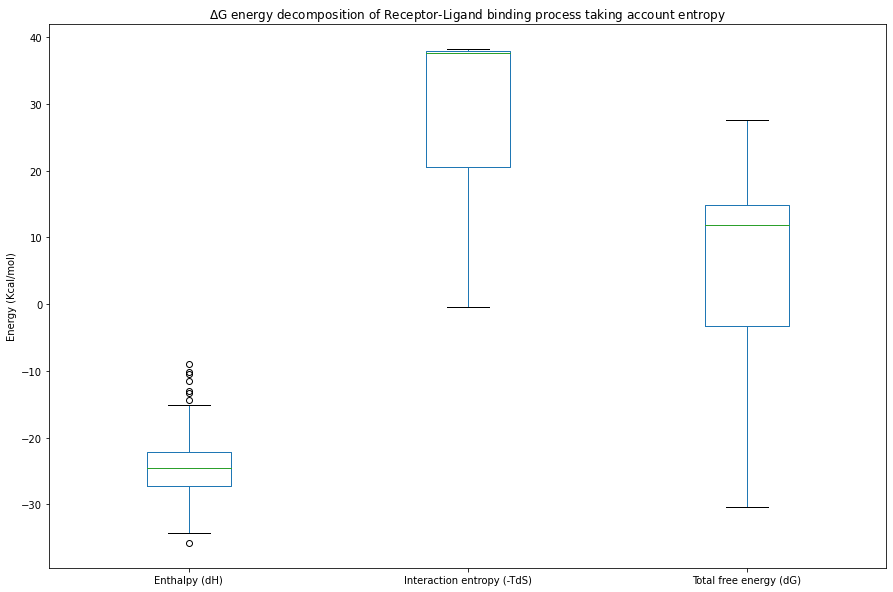

In [13]:
delta_total.mean().plot(ylabel='Energy (Kcal/mol)',title=r'$\Delta$G energy decomposition of Receptor-Ligand binding process taking account entropy',kind='bar',figsize=[15, 10])
delta_total.plot(ylabel='Energy (Kcal/mol)',title=r'$\Delta$G energy decomposition of Receptor-Ligand binding process taking account entropy',kind='box',figsize=[15, 10])


Text(0.5, 1.0, '$\\Delta$G energy decomposition of Receptor-Ligand binding process taking account entropy')

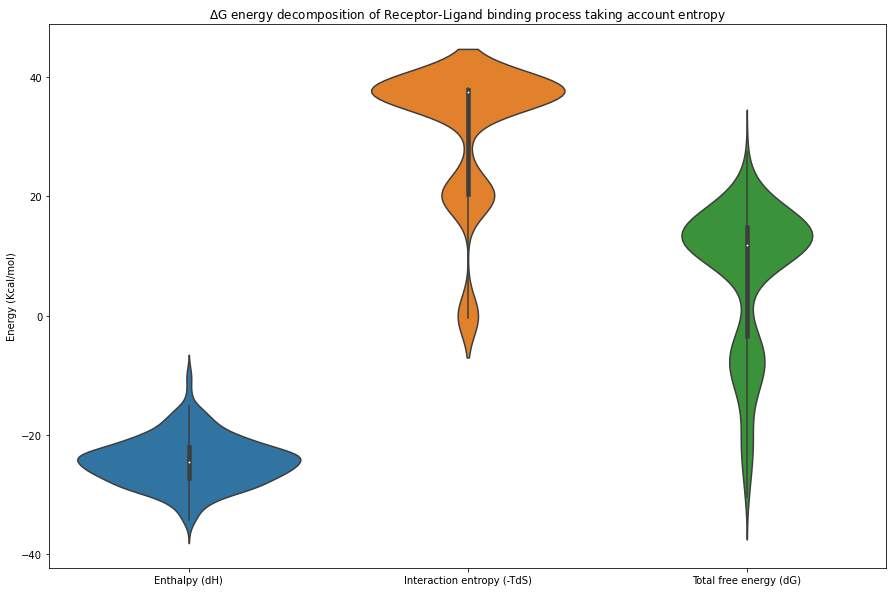

In [14]:
fig = plt.figure(figsize=[15, 10])
ax1 = fig.add_subplot(111)
ax1.set_ylabel(r"Energy (Kcal/mol)")
sns.violinplot(data=delta_total,scale="area")
plt.title(r'$\Delta$G energy decomposition of Receptor-Ligand binding process taking account entropy')

In [16]:
delta_total.describe()

Enthalpy (dH)  Interaction entropy (-TdS)  Total free energy (dG)
count     501.000000                  501.000000              501.000000
mean      -24.426357                   31.339338                6.912981
std         4.101457                   11.358651               12.241387
min       -35.781821                   -0.454638              -30.451016
25%       -27.220611                   20.487929               -3.335543
50%       -24.508411                   37.582959               11.859322
75%       -22.107902                   37.819480               14.890959
max        -8.918026                   38.207056               27.500752

In [17]:
delta_total.to_csv('dG_total_lig3.csv')

In [18]:
delta_parcial.to_csv('dG_parcial_lig3.csv')

## Checking normality distribution of data

In [19]:
from scipy.stats import shapiro

##Function to check normality

def normality_test(X):

    (stat,p)=shapiro(X)
    P=p   
    alpha=0.05
    if P>alpha:
            print('Sample looks Gaussian (fail to reject H0)')
    else:
            print('Sample does not look Gaussian (reject H0)')  

### Total data

In [20]:
delta_total.apply(normality_test,axis=0)

Sample does not look Gaussian (reject H0)
Sample does not look Gaussian (reject H0)
Sample does not look Gaussian (reject H0)


Enthalpy (dH)                 None
Interaction entropy (-TdS)    None
Total free energy (dG)        None
dtype: object

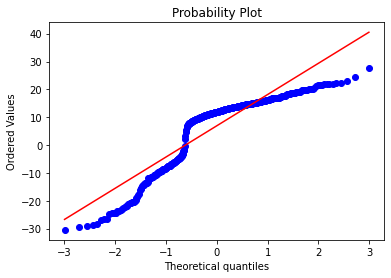

In [21]:
import pylab
import scipy.stats as stats

stats.probplot((delta_total['Total free energy (dG)']),dist='norm',plot=pylab)
pylab.show()

### Decomposition data

In [22]:
delta_parcial.apply(normality_test,axis=0)

Sample does not look Gaussian (reject H0)
Sample does not look Gaussian (reject H0)
Sample does not look Gaussian (reject H0)
Sample does not look Gaussian (reject H0)
Sample does not look Gaussian (reject H0)
Sample does not look Gaussian (reject H0)
Sample does not look Gaussian (reject H0)
Sample does not look Gaussian (reject H0)
Sample does not look Gaussian (reject H0)
Sample does not look Gaussian (reject H0)
Sample does not look Gaussian (reject H0)


BOND                   None
ANGLE                  None
DIHED                  None
VDWAALS                None
EEL                    None
EGB                    None
ESURF                  None
DELTA G gas            None
DELTA G solv           None
DELTA TOTAL            None
Interaction entropy    None
dtype: object

## Bootstraping of non-normal data to build confidence intervals

In [23]:
##Function to boostraping (empirical bootstraping)

from tqdm import tqdm

def estadistico_media(X):
    
    estadistico=np.mean(X)
    return(estadistico)

def boostraping_media(X,fun_estadistico,n_iteraciones=100000):
    
    n=len(X)
    stadistico_muestra=fun_estadistico(X)
    dist_boot=np.full(shape=n_iteraciones,fill_value=np.nan)
    
    for i in tqdm(range(n_iteraciones)):
        resample=np.random.choice(X,size=n,replace=True)
        dist_boot[i]=fun_estadistico(resample)
   
    return dist_boot

In [24]:
import scipy.stats as stats

def Confidence_Intervals(X,n):
##IC Bootstraping empírico
    cuantiles=np.quantile(a=X,q=[0.025,0.975])
    print('------------------')
    print('Empirical interval')
    print('------------------')
    print(cuantiles)

### Decomposition data

In [25]:
parcial_bootstrapeado=delta_parcial.apply(boostraping_media,fun_estadistico=estadistico_media,n_iteraciones=100000,axis=0)
parcial_bootstrapeado

100%|████████████████████████████████| 100000/100000 [00:03<00:00, 25254.14it/s]


BOND         ANGLE         DIHED    VDWAALS        EEL  \
0     -1.372156e-15  1.397206e-06 -1.796407e-06 -37.802735 -44.639913   
1      2.794411e-06  5.988024e-06 -3.992017e-07 -38.008531 -42.797538   
2      5.189621e-06  3.592814e-06 -7.984033e-07 -37.739356 -43.424561   
3      1.996007e-07  5.988024e-06  7.984031e-07 -37.981694 -43.201918   
4      1.596806e-06 -1.596806e-06 -2.994012e-06 -37.868143 -45.347743   
...             ...           ...           ...        ...        ...   
99995 -1.197605e-06  2.994012e-06 -3.393214e-06 -37.774500 -43.304814   
99996  5.988024e-07  1.010290e-13 -1.397206e-06 -37.735373 -43.728759   
99997  3.193613e-06  5.588822e-06 -2.395210e-06 -37.878830 -42.950925   
99998 -5.613252e-14  3.592814e-06 -6.586826e-06 -37.679480 -43.302978   
99999  6.187625e-06  2.195609e-06 -2.195609e-06 -37.637909 -44.214394   

             EGB     ESURF  DELTA G gas  DELTA G solv  DELTA TOTAL  \
0      61.673010 -4.660149   -80.606555     56.969371   -24.617740   
1      62.003063 -4.718965   -82.072101     56.784223   -25.012034   
2      61.955523 -4.675291   -81.616544     56.484263   -24.536926   
3      61.763697 -4.698690   -81.114166     57.822219   -24.615011   
4      61.435509 -4.694491   -82.080490     57.586104   -24.634782   
...          ...       ...          ...           ...          ...   
99995  62.084640 -4.689069   -82.107497     56.957815   -24.614213   
99996  61.394896 -4.700044   -80.658506     57.763343   -24.373154   
99997  61.431204 -4.663715   -81.391804     56.753145   -24.518443   
99998  61.416512 -4.695039   -81.230959     57.183773   -24.458794   
99999  62.132290 -4.729155   -81.561018     56.975319   -24.121825   

       Interaction entropy  
0                31.603172  
1                30.662975  
2                30.918522  
3                31.077544  
4                31.537940  
...                    ...  
99995            31.150951  
99996            31.955571  
99997            31.835484  
99998            31.115866  
99999            31.568849  

[100000 rows x 11 columns]

In [26]:
parcial_bootstrapeado.apply(Confidence_Intervals,n=100000,axis=0)

------------------
Empirical interval
------------------
[-2.7944112e-06  5.1896208e-06]
------------------
Empirical interval
------------------
[-1.99600792e-06  6.38722564e-06]
------------------
Empirical interval
------------------
[-6.98602802e-06  1.79640712e-06]
------------------
Empirical interval
------------------
[-38.22373971 -37.50891122]
------------------
Empirical interval
------------------
[-44.7748049  -42.53952447]
------------------
Empirical interval
------------------
[60.99799858 62.5877439 ]
------------------
Empirical interval
------------------
[-4.74217759 -4.64652793]
------------------
Empirical interval
------------------
[-82.54812545 -80.48350918]
------------------
Empirical interval
------------------
[56.28426557 57.91122338]
------------------
Empirical interval
------------------
[-24.7854352  -24.06619367]
------------------
Empirical interval
------------------
[30.32985896 32.31818861]


BOND                   None
ANGLE                  None
DIHED                  None
VDWAALS                None
EEL                    None
EGB                    None
ESURF                  None
DELTA G gas            None
DELTA G solv           None
DELTA TOTAL            None
Interaction entropy    None
dtype: object

In [27]:
parcial_bootstrapeado.apply(estadistico_media,axis=0)

BOND                    0.000001
ANGLE                   0.000002
DIHED                  -0.000003
VDWAALS               -37.866743
EEL                   -43.655927
EGB                    61.790825
ESURF                  -4.694469
DELTA G gas           -81.519382
DELTA G solv           57.098392
DELTA TOTAL           -24.426163
Interaction entropy    31.341454
dtype: float64

### Total data

In [28]:
total_boostrapeado=delta_total.apply(boostraping_media,fun_estadistico=estadistico_media,n_iteraciones=100000,axis=0)

100%|████████████████████████████████| 100000/100000 [00:03<00:00, 25113.81it/s]


In [29]:
total_boostrapeado.apply(Confidence_Intervals,n=100000,axis=0)

------------------
Empirical interval
------------------
[-24.78548907 -24.06373304]
------------------
Empirical interval
------------------
[30.32397585 32.31417108]
------------------
Empirical interval
------------------
[5.83109331 7.9638312 ]


Enthalpy (dH)                 None
Interaction entropy (-TdS)    None
Total free energy (dG)        None
dtype: object

In [30]:
total_boostrapeado.apply(estadistico_media,axis=0)

Enthalpy (dH)                -24.425090
Interaction entropy (-TdS)    31.338173
Total free energy (dG)         6.910628
dtype: float64

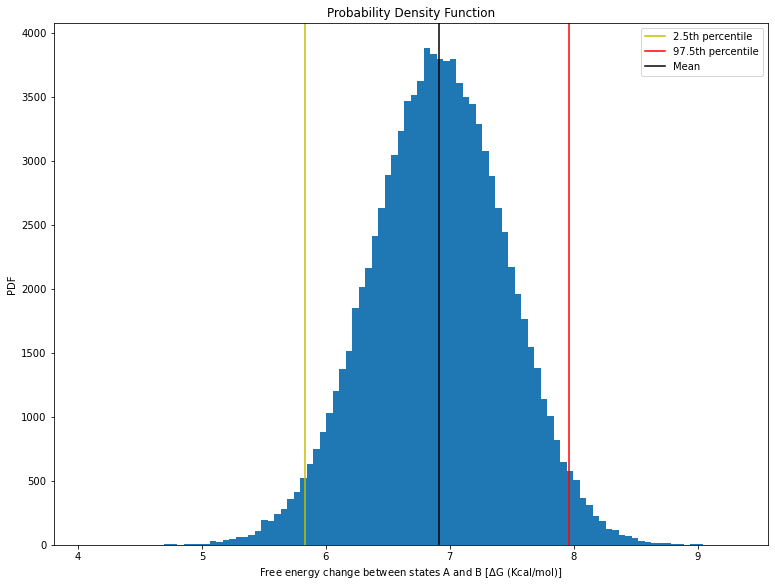

In [31]:
import scipy.stats as st 

fig = plt.figure(figsize=[12.8, 9.6])


# Plot the PDF for bootstrap replicates as histogram
plt.hist(total_boostrapeado['Total free energy (dG)'],bins=100)

# Showing the related percentiles
plt.axvline(x=np.percentile(total_boostrapeado['Total free energy (dG)'],[2.5]), ymin=0, ymax=1,label='2.5th percentile',c='y')
plt.axvline(x=np.percentile(total_boostrapeado['Total free energy (dG)'],[97.5]), ymin=0, ymax=1,label='97.5th percentile',c='r')
plt.axvline(x=total_boostrapeado['Total free energy (dG)'].mean(), ymin=0, ymax=1,label='Mean',c='black')

plt.xlabel("Free energy change between states A and B [$\\Delta$G (Kcal/mol)]")
plt.ylabel("PDF")
plt.title("Probability Density Function")
plt.legend()
plt.show()

# Obtaining free energy estimates from biological activity

<p>Using Cheng-Prusoff relation, one can relate the $IC_{50}$ with the inhibition constant $K_{i}$ assuming competitive inhibition by means of two expressions:

<b>Relation 1</b> $\frac{IC_{50}^{1}}{IC_{50}^{2}}=\frac{K_{i}^{1}}{K_{i}^{2}}$ 

<b>Relation 2</b> $K_{i}=\frac{IC_{50}}{1+\frac{[S]}{K_{m}}}$ 
    
According to the paper, for the enzyme $K_{m}=220 \pm 21 \mu M$ , $[S]=100 \mu M$, $IC_{50}$ (of this ligand) = $0.010 \pm 831763.77 \mu M$. Also for the reference ligand we have $K_{i}=2.9 \pm 0.33 \mu M $ and $IC_{50}=6.3 \pm 0.7 \mu M$  

</p>

#### Relation 1

In [32]:
#Values of equilibrium and kinetics parameters. All in M (1M = 10e6 uM)

K_iref= 2.9*10**(-6)
IC_50xtal=10**(-8)
IC_50ref=10**(-5.2)

In [33]:
K_ixtal=IC_50xtal*K_iref/IC_50ref
K_ixtal

4.596190258137231e-09

In [34]:
'{:0.3e}'.format(K_ixtal) ##M

'4.596e-09'

In [35]:
import math

##Standard deviation of each value

K_iref_sd=0.33*(10**(-6))##M
IC_50ref_sd=10**(-0.13) ##M
IC_50xtal_sd=10**(-0.08) ##M

##Size of sampĺe of each value

K_iref_N=2
IC_50ref_N=70 ##M
IC_50xtal_N=2
K_ixtal_N=2

##Uncertainty propagation measurement.

K_ixtal_sd=K_ixtal*math.sqrt((K_iref_sd/K_iref)**2+(IC_50ref_sd/IC_50ref)**2+(IC_50xtal_sd/IC_50xtal)**2)
K_ixtal_sd

0.38229483557002675

### Free energy estimation

<p>Assuming a standard relationship between K and G, we have:
    
$\Delta G_{b}= -RT Ln(K_{b})$ 
    
    
$\Delta G_{i}= RT Ln(K_{i})$</p>

#### Relation 1

In [36]:
##Free energy
R=1.9858775*10**(-3)##kcal/mol*K
T=310 #K
dG_exp=R*T*math.log(K_ixtal)  ##Kcal
round(dG_exp,2)

-11.82

In [37]:
##Standard deviation of experimental free energy
G_exp_sd=K_ixtal_sd/dG_exp
G_exp_sd

-0.032346510264672855

In [38]:
##Confidence interval (Assuming normality of data)

CI_exp_up=dG_exp - (1.96)*(G_exp_sd/np.sqrt(K_ixtal_N)) 
CI_exp_down=dG_exp + (1.96)*(G_exp_sd/np.sqrt(K_ixtal_N)) 
print(CI_exp_up, CI_exp_down)

-11.773905103629481 -11.863565055712492


# Statistical error, significance t-test and confidence interval between experimental and simulated affinity

## Significance t-test

In [39]:
from scipy.stats import ttest_ind_from_stats

(stat,p)=ttest_ind_from_stats(mean1=dG_exp,std1=-G_exp_sd,nobs1=K_ixtal_N,
                     mean2=np.mean(delta_total['Total free energy (dG)']),std2=np.std(delta_total['Total free energy (dG)']),
                     nobs2=len(delta_total['Total free energy (dG)']),equal_var=True)
alpha=0.05 #(95 % significance)

if p>alpha:
    print('True difference between group means is zero (fail to reject H0)')
else:
    print('True difference between group means is different from zero (reject H0)')    

True difference between group means is different from zero (reject H0)


## Effect size

In [42]:
def Hedges_g(s1,s2,n1,n2,mn1,mn2):
    
    s=np.sqrt(((n1-1)*s1*s1+(n2-1)*s2*s2)/(n1+n2-2))
    d=(mn1-mn2)/s
    g=d*(1-(3/(4*(n1+n2)-9)))

    G=g
    if G<0.5:
        print('Small effect (Small difference between means of two variables in terms of standard deviations)')

    elif 0.6 <G or G<0.8:    
        print('Medium effect (Medium difference between means of two variables in terms of standard deviations)')

    elif G>0.9:
        print('Large effect (large difference between means of two variables in terms of standard deviations)')


In [43]:
Hedges_g(-G_exp_sd,np.std(delta_total['Total free energy (dG)']),
                     K_ixtal_N,len(delta_total['Total free energy (dG)']),dG_exp,np.mean(delta_total['Total free energy (dG)']))

Small effect (Small difference between means of two variables in terms of standard deviations)


## Statistical error

In [44]:
error_abs=np.sqrt((dG_exp-np.mean(delta_total['Total free energy (dG)']))**2)
error_abs

18.73171607556334

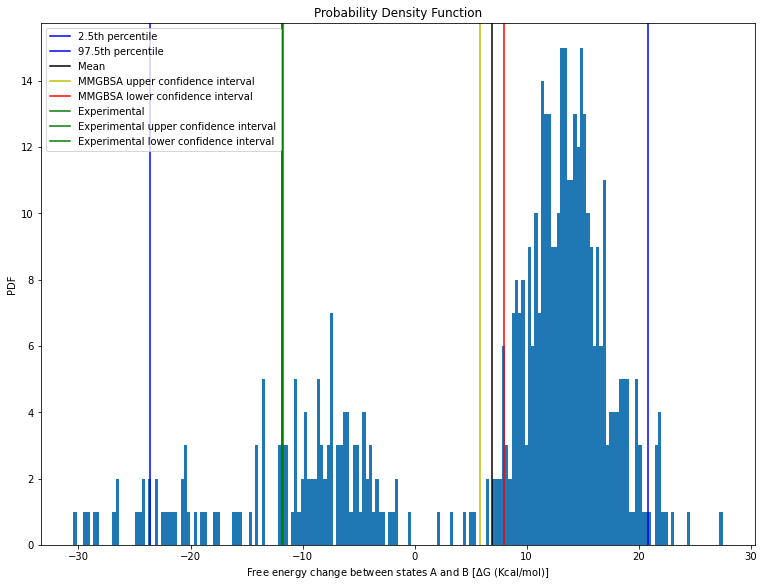

In [45]:
fig = plt.figure(figsize=[12.8, 9.6])


# Plot the PDF for bootstrap replicates as histogram
plt.hist(delta_total['Total free energy (dG)'],bins=200)

# Showing the related percentiles
plt.axvline(x=np.percentile(delta_total['Total free energy (dG)'],[2.5]), ymin=0, ymax=1,label='2.5th percentile',c='b')
plt.axvline(x=np.percentile(delta_total['Total free energy (dG)'],[97.5]), ymin=0, ymax=1,label='97.5th percentile',c='b')
plt.axvline(x=delta_total['Total free energy (dG)'].mean(), ymin=0, ymax=1,label='Mean',c='black')

plt.axvline(x=st.norm.interval(alpha=0.95,loc=np.mean(delta_total['Total free energy (dG)']),
                    scale=st.sem(delta_total['Total free energy (dG)']))[0], ymin=0, ymax=1,label='MMGBSA upper confidence interval',c='y')
plt.axvline(x=st.norm.interval(alpha=0.95,loc=np.mean(delta_total['Total free energy (dG)']),
                    scale=st.sem(delta_total['Total free energy (dG)']))[1], ymin=0, ymax=1,label='MMGBSA lower confidence interval',c='r')


plt.axvline(x=dG_exp, ymin=0, ymax=1,label='Experimental',c='green')
plt.axvline(x=dG_exp-(1.96*G_exp_sd/np.sqrt(K_ixtal_N)),
            ymin=0, ymax=1,label='Experimental upper confidence interval',c='green')
plt.axvline(x=dG_exp+(1.96*G_exp_sd/np.sqrt(K_ixtal_N)),
            ymin=0, ymax=1,label='Experimental lower confidence interval ',c='green')


plt.xlabel("Free energy change between states A and B [$\\Delta$G (Kcal/mol)]")
plt.ylabel("PDF")
plt.title("Probability Density Function")
plt.legend()
plt.show()

In [46]:
st.norm.interval(alpha=0.95,loc=np.mean(delta_total['Total free energy (dG)']),
                    scale=st.sem(delta_total['Total free energy (dG)']))

(5.841067224162982, 7.984894767621725)

## Confidence interval

In [47]:
int_confi_dic={}
int_confi_dic['categoria']=['Experimental','MMGBSA-IE']
int_confi_dic['lower']=[dG_exp-(1.96*G_exp_sd/np.sqrt(K_ixtal_N)),(st.norm.interval(alpha=0.95,loc=np.mean(delta_total['Total free energy (dG)']),
                    scale=st.sem(delta_total['Total free energy (dG)'])))[1]]
int_confi_dic['upper']=[dG_exp+(1.96*G_exp_sd/np.sqrt(K_ixtal_N)),(st.norm.interval(alpha=0.95,loc=np.mean(delta_total['Total free energy (dG)']),
                    scale=st.sem(delta_total['Total free energy (dG)'])))[0]]
int_confi_dic

{'categoria': ['Experimental', 'MMGBSA-IE'],
 'lower': [-11.773905103629481, 7.984894767621725],
 'upper': [-11.863565055712492, 5.841067224162982]}

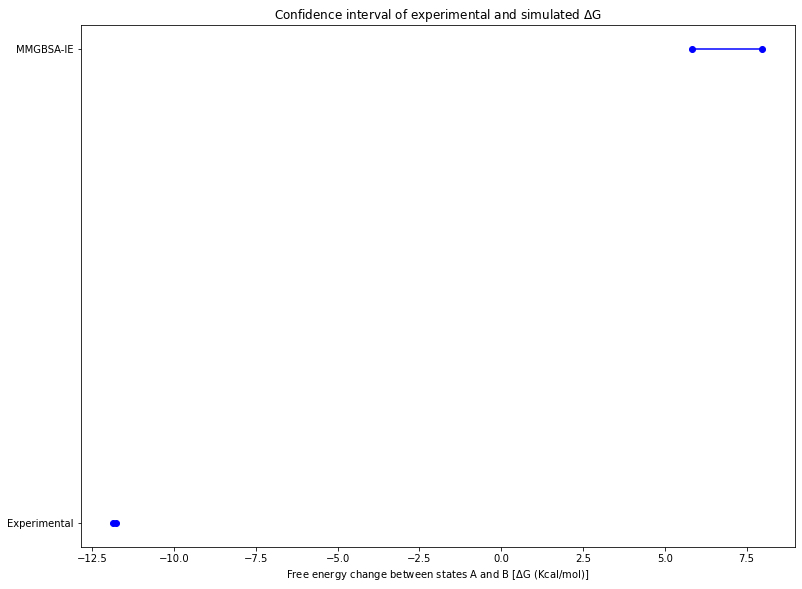

In [48]:
fig = plt.figure(figsize=[12.8, 9.6])

for lower, upper, y in zip(int_confi_dic['lower'],int_confi_dic['upper'],range(len(int_confi_dic))):
    plt.plot((lower, upper),(y,y),'ro-',color='blue')
    
plt.yticks(range(len(int_confi_dic['categoria'])),list(int_confi_dic['categoria']))


plt.xlabel("Free energy change between states A and B [$\\Delta$G (Kcal/mol)]")
plt.title("Confidence interval of experimental and simulated $\\Delta$G")
plt.show()

### Distance between H-donor in OH-4 (Ligand) and O acceptor (Cys 606 Protein) 

In [64]:
Cys606O = u_ana.select_atoms("resid 606 and name O") # Atom selection Protein
LIG4OH = u_ana.select_atoms("resname MOL and name H4") # Atom selection Ligand

DIS = []
for ts in u_ana.trajectory:     # iterate through all frames
    G1 = Cys606O.positions[0] # Coordinates 1
    G2 = LIG4OH.positions[0] # Coordinates 2
    d = G1 - G2 # vector from atom positions
    dist = np.linalg.norm(d) # end-to-end distance
    DIS.append((ts.time, dist))
    DIS_a = np.array(DIS)

/home/edward/anaconda3/envs/AmberTools20/lib/python3.9/site-packages/MDAnalysis/core/selection.py:521: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  mask = np.zeros(len(group), dtype=np.bool)


Text(0.5, 1.0, 'Distance H donor of OH-4 Ligand and O aceptor of Cys 606 Protein')

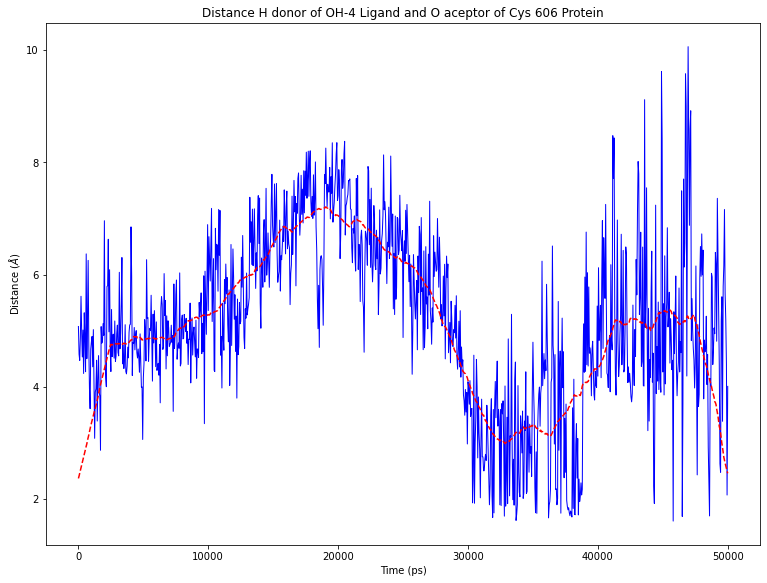

In [66]:
%matplotlib inline
fig = plt.figure(figsize=[12.8, 9.6])
ax = plt.subplot(111)
ax = plt.plot(DIS_a[:,0], DIS_a[:,1], 'b', lw=1)
ax = plt.plot(DIS_a[:,0],moving_average(DIS_a[:,1],100), label='Average convolution hydrogen bond', linestyle='--',c='r')
plt.xlabel("Time (ps)")
plt.ylabel("Distance ($\AA$)")
plt.title('Distance H donor of OH-4 Ligand and O aceptor of Cys 606 Protein')

In [67]:
HB_Movie=u_ana.select_atoms("(resid 606) or (resname MOL)")
HB_Movie

/home/edward/anaconda3/envs/AmberTools20/lib/python3.9/site-packages/MDAnalysis/core/selection.py:640: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  mask = np.zeros(len(vals), dtype=np.bool)


<AtomGroup with 69 atoms>

In [68]:
HBMD_Movie=nv.show_mdanalysis(HB_Movie,gui=True)
HBMD_Movie

NGLWidget(max_frame=1000)

<p>The hydrogen bonds seems to be unstable</p> 

### Distance between C-10 aromatic carbon (Ligand) and CA backbone carbon (Gly 681 Protein) 

In [69]:
Gly681CA = u_ana.select_atoms("resid 681 and name CA") # Atom selection Protein
LIGC10 = u_ana.select_atoms("resname MOL and name C10") # Atom selection Ligand

DIS = []
for ts in u_ana.trajectory:     # iterate through all frames
    G1 = Gly681CA.positions[0] # Coordinates 1
    G2 = LIGC10.positions[0] # Coordinates 2
    d = G1 - G2 # vector from atom positions
    dist = np.linalg.norm(d) # end-to-end distance
    DIS.append((ts.time, dist))
    DIS_a = np.array(DIS)

/home/edward/anaconda3/envs/AmberTools20/lib/python3.9/site-packages/MDAnalysis/core/selection.py:521: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  mask = np.zeros(len(group), dtype=np.bool)


Text(0.5, 1.0, 'Distance C10 aromatic (Ligand) and C-$\\alpha$ of Gly 681 (Protein)')

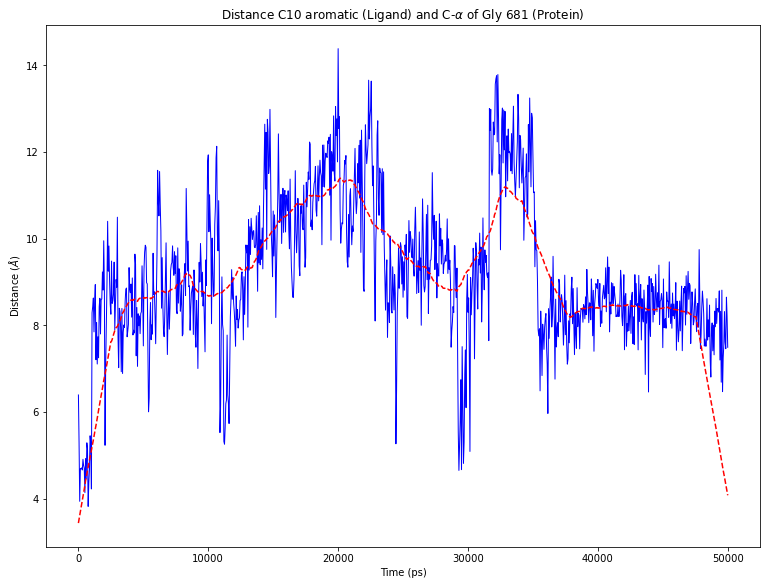

In [72]:
%matplotlib inline
fig = plt.figure(figsize=[12.8, 9.6])
ax = plt.subplot(111)
ax = plt.plot(DIS_a[:,0], DIS_a[:,1], 'b', lw=1)
ax = plt.plot(DIS_a[:,0],moving_average(DIS_a[:,1],100), label='Average convolution hydrophobic interaction', linestyle='--',c='r')
plt.xlabel("Time (ps)")
plt.ylabel("Distance ($\AA$)")
plt.title(r'Distance C10 aromatic (Ligand) and C-$\alpha$ of Gly 681 (Protein)')

In [73]:
HB_Movie=u_ana.select_atoms("(resid 681) or (resname MOL)")
HB_Movie

/home/edward/anaconda3/envs/AmberTools20/lib/python3.9/site-packages/MDAnalysis/core/selection.py:640: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  mask = np.zeros(len(vals), dtype=np.bool)


<AtomGroup with 65 atoms>

In [74]:
HBMD_Movie=nv.show_mdanalysis(HB_Movie,gui=True)
HBMD_Movie

NGLWidget(max_frame=1000)

<p>The hydrophobic collapse seems to be stable (Driven force?)</p>

### Clustering Analysis 

<p>Here we generated 4 clusters for the configurational space of our protein. The goal is to obtain four representative structures (centroids) that are going to be analyzed by means of NCI (non-covalent interaction analysis).</p

In [75]:
CA_Prot = u_ana.select_atoms("name CA") # Atom selection 

CA= []
for ts in u_ana.trajectory:   # iterate through all frames
    G = CA_Prot.positions[0] # Coordinates 1
    CA.append((G))
    CA_a = np.array(CA)

/home/edward/anaconda3/envs/AmberTools20/lib/python3.9/site-packages/MDAnalysis/core/selection.py:521: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  mask = np.zeros(len(group), dtype=np.bool)


In [79]:
from sklearn.cluster import KMeans

kmeans = KMeans(n_clusters=3, random_state=0).fit(CA_a)

Text(0.5, 0, 'Z coordinate')

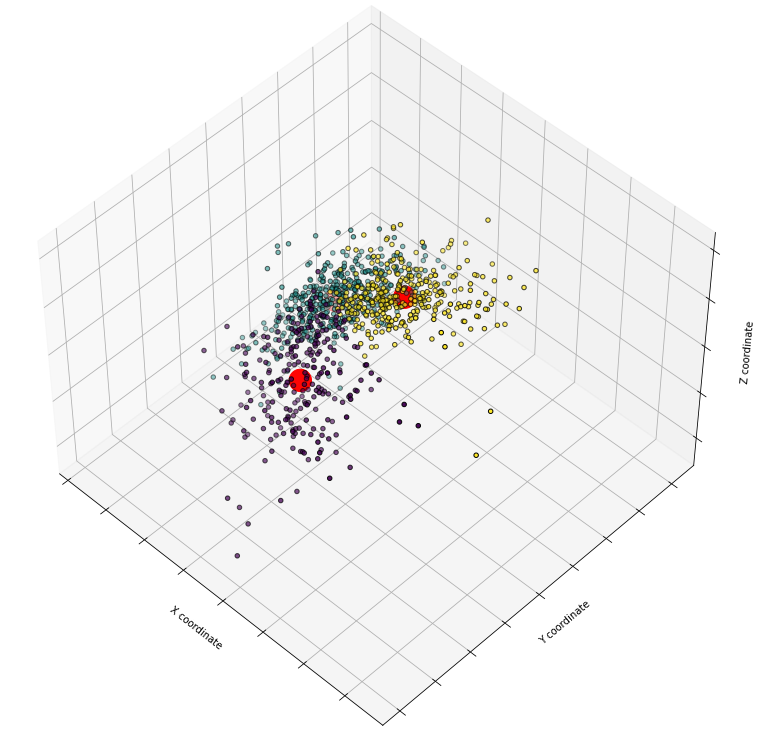

In [80]:
from mpl_toolkits.mplot3d import Axes3D

fig = plt.figure(1, figsize=(15, 10))
ax = Axes3D(fig, rect=[0, 0, .95, 1], elev=48, azim=134)
labels = kmeans.labels_

ax.scatter(CA_a[:, 0], CA_a[:, 1], CA_a[:, 2],
               c=labels.astype(float), edgecolor='k')
ax.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], kmeans.cluster_centers_[:, 2],s=500,c='red')

ax.w_xaxis.set_ticklabels([])
ax.w_yaxis.set_ticklabels([])
ax.w_zaxis.set_ticklabels([])
ax.set_xlabel('X coordinate')
ax.set_ylabel('Y coordinate')
ax.set_zlabel('Z coordinate')

<p>Let's get the four structures that corresponds to the centroids of the clusters</p>

In [81]:
from sklearn.metrics import pairwise_distances_argmin_min

closest, _ = pairwise_distances_argmin_min(kmeans.cluster_centers_, CA_a)
closest

array([633, 791, 221])

<p>So, let's extract these four structures from the respective snapshots to carry out the NCI analysis: Structures at 12250, 29950, 4250 and 45950 ps</p>

In [ ]:
#%%bash
#gmx_mpi trjconv -s md_0_10.tpr -f md_0_10noPBC.xtc -o 12250.pdb -dump 12250 -n index.ndx
#gmx_mpi trjconv -s md_0_10.tpr -f md_0_10noPBC.xtc -o 29950.pdb -dump 29950 -n index.ndx
#gmx_mpi trjconv -s md_0_10.tpr -f md_0_10noPBC.xtc -o 4250.pdb -dump 4250 -n index.ndx
#gmx_mpi trjconv -s md_0_10.tpr -f md_0_10noPBC.xtc -o 45950.pdb -dump 45950 -n index.ndx

### Number of hydrogen bonds between protein and ligand over time

In [58]:
from MDAnalysis.analysis.hydrogenbonds.hbond_analysis import (
  HydrogenBondAnalysis as HBA)

u_HB =u_ana

hbonds = HBA(universe=u_HB,d_h_cutoff=1.2,d_a_cutoff=3.0,d_h_a_angle_cutoff=150)

protein_hydrogens_sel = "(resid 510 and name HZ1 HZ2 HZ3) or (resid 603 and name HG) or (resid 606 and name H) or (resid 621 and name HZ1 HZ2 HZ3) or (resid 656 and name HD21 HD22) or (resid 657 and name H HD2) or (resid 680 and name H) or (resid 683 and name HD21 HD22) or (resid 742 and name HE2) or (resid 863 and name HG1)"
protein_acceptors_sel = "(resid 602 and name O) or (resid 603 and name OG) or (resid 606 and name O) or (resid 657 and name OD1) or (resid 708 and name O) or (resid 739 and name O) or (resid 742 and name OE1 OE2) or (resid 863 and name OG1)"
protein_donors_sel    = "(resid 510 and name NZ) or (resid 603 and name OG) or (resid 606 and name N) or (resid 621 and name NZ) or (resid 656 and name ND2) or (resid 657 and name N OD2) or (resid 680 and name N) or (resid 683 and name ND2) or (resid 742 and name OE2) or (resid 863 and name OG1)"

lig_hydrogens_sel = "resname MOL and name H1 H2 H3 H4"
lig_acceptors_sel = "resname MOL and name O1 O2 O3 O4 O5"
lig_donors_sel    = "resname MOL and name O2 O3 O4 O5"

hbonds.hydrogens_sel = f"({protein_hydrogens_sel}) or ({lig_hydrogens_sel})"
hbonds.acceptors_sel = f"({protein_acceptors_sel}) or ({lig_acceptors_sel})"
hbonds.donors_sel    = f"({protein_donors_sel}) or ({lig_donors_sel})"
hbonds.run()

/home/edward/anaconda3/envs/AmberTools20/lib/python3.9/site-packages/MDAnalysis/core/selection.py:521: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  mask = np.zeros(len(group), dtype=np.bool)
/home/edward/anaconda3/envs/AmberTools20/lib/python3.9/site-packages/MDAnalysis/lib/distances.py:715: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated 

/home/edward/anaconda3/envs/AmberTools20/lib/python3.9/site-packages/MDAnalysis/analysis/hydrogenbonds/hbond_analysis.py:519: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  counts[indices.astype(np.int)] = tmp_counts


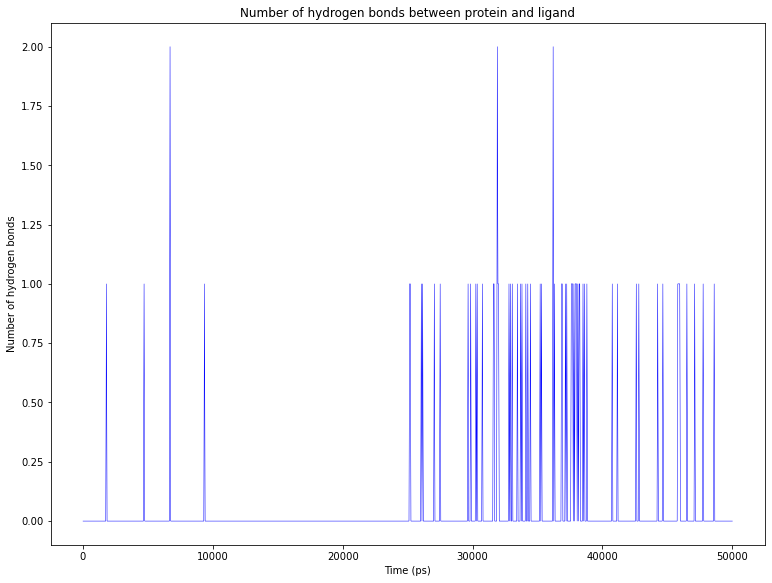

In [59]:
%matplotlib inline
fig = plt.figure(figsize=[12.8, 9.6])
ax = plt.subplot(111)
ax.plot(hbonds.times, hbonds.count_by_time(), 'b-', lw=0.5)
ax.set_title(r"Number of hydrogen bonds between protein and ligand")    
ax.set_xlabel("Time (ps)")
ax.set_ylabel(r"Number of hydrogen bonds")
plt.draw()

### Frequency of apparition of hydrogen bonds between ligand and protein

In [61]:
df_HD = pd.DataFrame(hbonds.count_by_type(), columns = ['Donor','Aceptor','Frequency_apparition'])
df_HD['Frequency_apparition']=df_HD['Frequency_apparition'].astype('int')
df_HD[['Resid_Donor', 'Atom_Donor']] = df_HD['Donor'].str.split(':', expand=True)
df_HD[['Resid_Aceptor', 'Atom_Aceptor']] = df_HD['Aceptor'].str.split(':', expand=True)
df_HD=df_HD.drop(columns=['Donor', 'Aceptor']).sort_values(by=['Frequency_apparition'],ascending=False)
df_HD

/home/edward/anaconda3/envs/AmberTools20/lib/python3.9/site-packages/MDAnalysis/analysis/hydrogenbonds/hbond_analysis.py:537: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  d = self.u.atoms[self.hbonds[:, 1].astype(np.int)]
/home/edward/anaconda3/envs/AmberTools20/lib/python3.9/site-packages/MDAnalysis/analysis/hydrogenbonds/hbond_analysis.py:541: DeprecationWarning: `np.str` is a deprecated alias for the builtin `str`. To silence this warning, use `str` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the

Frequency_apparition Resid_Donor Atom_Donor Resid_Aceptor Atom_Aceptor
4                    37         MOL          O           CYS            O
2                    15         CYS          N           MOL            O
0                    10         ASN          N           MOL            O
3                     4         LYS          N           MOL            O
1                     1        ASPH          O           SER            O

<p><b>Ligand as a donor hydrogen bond</b></p>

In [62]:
df_HD[df_HD['Resid_Donor'].isin(['MOL'])].sort_values(by=['Frequency_apparition'],ascending=False)

Frequency_apparition Resid_Donor Atom_Donor Resid_Aceptor Atom_Aceptor
4                    37         MOL          O           CYS            O

<p><b>Ligand as a acceptor hydrogen bond</b></p>

In [63]:
df_HD[df_HD['Resid_Aceptor'].isin(['MOL'])].sort_values(by=['Frequency_apparition'],ascending=False)

Frequency_apparition Resid_Donor Atom_Donor Resid_Aceptor Atom_Aceptor
2                    15         CYS          N           MOL            O
0                    10         ASN          N           MOL            O
3                     4         LYS          N           MOL            O